In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from datetime import datetime

In [2]:
# Record the start time to measure script execution duration
start_time = datetime.now()
# File path for the training dataset
data_train_file = "data_train.csv"
# File path for the testing dataset
data_test_file = "data_test.csv"



In [3]:
# Define column names for the NSL-KDD dataset
col_names = [
    # Basic features of individual connections
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
             
    # Content features within a connection
    "land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
            
    # Traffic features computed over a time window
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate",
             
    # Host-based traffic features
    "dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",
             
    # Label column indicating normal or anomalous traffic
    "label"]

In [4]:
# Load the training dataset into a pandas DataFrame
# The dataset does not have a header row, so we assign column names explicitly
df_train = pd.read_csv(data_train_file, header=None, names=col_names)

# Load the testing dataset into a pandas DataFrame
# The same column names are applied for consistency with the training data
df_test = pd.read_csv(data_test_file, header=None, names=col_names)

In [5]:
# Print the dimensions of the training dataset
print(f"Training data set dimension:    {df_train.shape}")
# Print the dimensions of the testing dataset
print(f"Test data set dimension:        {df_test.shape}")

Training data set dimension:    (125973, 42)
Test data set dimension:        (22544, 42)


In [6]:
# Display the first 10 rows of the training dataset for inspection
df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [7]:
# Display the first 10 rows of the testing dataset for inspection
df_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd
8,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd


Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


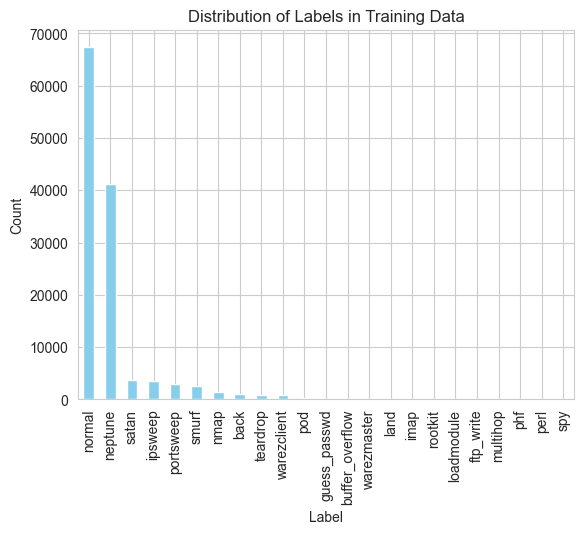

In [8]:
# Count the occurrences of each label in the training dataset
train_label_counts = df_train["label"].value_counts()

# Print the label distribution in the training set
print('Label distribution Training set:')
print(train_label_counts)

# Plot the label distribution as a bar chart
train_label_counts.plot(kind='bar', color='skyblue')

# Add title and axis labels for clarity
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

Label distribution Test Set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64


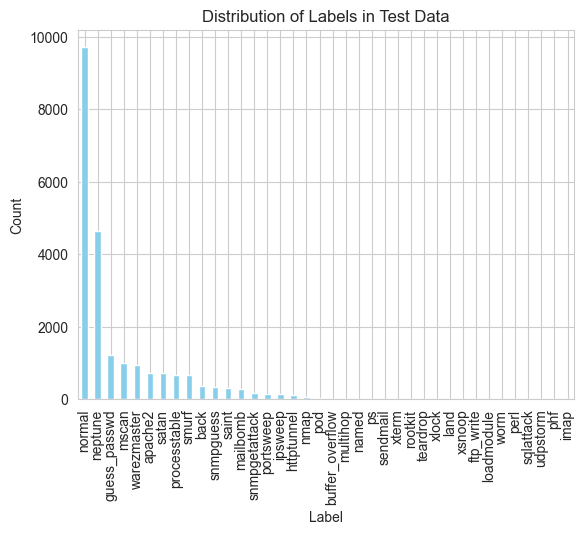

In [9]:
# Count the occurrences of each label in the test dataset
test_label_counts = df_test["label"].value_counts()

# Print the label distribution in the training set
print('Label distribution Test Set:')
print(test_label_counts)

# Plot the label distribution as a bar chart
test_label_counts.plot(kind='bar', color='skyblue')

# Add title and axis labels for clarity
plt.title('Distribution of Labels in Test Data')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

### DATA PREPROCESSING

In [10]:
# Print the number of unique categories for each categorical feature in the training set
print('Training set:')
for col_name in df_train.columns:
    # Check if the column is categorical
    if df_train[col_name].dtypes == 'object' :
        # Count unique categories
        unique_cat = len(df_train[col_name].unique())
        # Print the feature name and the number of unique categories
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Print the distribution of categories in the 'service' column
print('\nDistribution of categories in service:')
print(df_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [11]:
# Print the number of unique categories for each categorical feature in the test set
print('Test set:')
for col_name in df_test.columns:
    # Check if the column is categorical
    if df_test[col_name].dtypes == 'object': 
        # Count unique categories
        unique_cat = len(df_test[col_name].unique())  
        # Print the feature name and the number of unique categories
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Print the distribution of categories in the 'service' column of the test set
print('\nDistribution of categories in service:')
print(df_test['service'].value_counts().sort_values(ascending=False).head()) 


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories

Distribution of categories in service:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


### Extract Values


In [12]:
# Define the list of categorical columns to extract from both training and test sets
categorical_columns=['protocol_type', 'service', 'flag']

# Extract the categorical columns from the training and test sets
df_train_categorical_values = df_train[categorical_columns]
df_test_categorical_values = df_test[categorical_columns]

# Display the first 5 rows of the categorical values in the training set
df_train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [13]:
# Display the first 5 rows of the categorical values in the training set
df_test_categorical_values.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [14]:
# Get unique values from the 'protocol_type' column and sort them alphabetically
unique_protocol_train=sorted(df_train.protocol_type.unique())

# Add the prefix 'Protocol_type_' to each unique value in the 'protocol_type' column
protocol_type_string = "Protocol_type_"
unique_protocol_train_modified=[protocol_type_string + x for x in unique_protocol_train]

# Print the modified list of protocol types
print(unique_protocol_train_modified)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']


In [15]:
# Get unique values from the 'service' column and sort them alphabetically
unique_service_train=sorted(df_train.service.unique())

# Add the prefix 'service_' to each unique value in the 'service' column
service_string = 'service_'
unique_service_train_modified=[service_string + x for x in unique_service_train]

# Print the modified list of services
print(unique_service_train_modified)

['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 's

In [16]:
# Get unique values from the 'flag' column and sort them alphabetically
unique_flag_train=sorted(df_train.flag.unique())

# Add the prefix 'flag_' to each unique value in the 'flag' column
flag_string = 'flag_'
unique_flag_train_modified=[flag_string + x for x in unique_flag_train]

# Print the modified list of flags
print(unique_flag_train_modified)

['flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']


In [17]:
# Merge the modified lists of protocol_type, service, and flag into a single list
merged_cols_train = unique_protocol_train_modified + unique_service_train_modified + unique_flag_train_modified

# Print the merged list of columns
print(merged_cols_train)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [18]:
# Get unique values from the 'service' column in the test set and sort them alphabetically
unique_service_test=sorted(df_test.service.unique())

# Add the prefix 'service_' to each unique value in the 'service' column from the test set
unique_service_test_modified=[service_string + x for x in unique_service_test]

# Merge the modified lists for protocol_type (train), service (test), and flag (train) into a single list
merged_cols_test = unique_protocol_train_modified + unique_service_test_modified + unique_flag_train_modified

# Print the merged list of columns for the test set
print(merged_cols_test)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

### Label Encoding

In [19]:
# Apply Label Encoding to categorical columns (protocol_type, service, and flag) in the training dataset
df_train_categorical_values_encoded = df_train_categorical_values.apply(LabelEncoder().fit_transform)

# Print the original categorical values in the training dataset (before encoding)
print(df_train_categorical_values.head())
print("---\t---\t---\t---\t---\t---\t---\t---\t---\t---")
# Print the encoded categorical values in the training dataset (after encoding)
print(df_train_categorical_values_encoded.head())

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
---	---	---	---	---	---	---	---	---	---
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [20]:
# Apply Label Encoding to categorical columns (protocol_type, service, and flag) in the testing dataset
df_test_categorical_values_encoded = df_test_categorical_values.apply(LabelEncoder().fit_transform)

# Print the original categorical values in the testing dataset (before encoding)
print(df_test_categorical_values.head())
print("---\t---\t---\t---\t---\t---\t---\t---\t---")

# Print the encoded categorical values in the testing dataset (after encoding)
print(df_test_categorical_values_encoded.head())

  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO
---	---	---	---	---	---	---	---	---
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


In [21]:
# Initialize the OneHotEncoder to automatically determine categories for encoding
onehot_encoder = OneHotEncoder(categories='auto')

# Apply one-hot encoding to the label-encoded categorical values in the training dataset
df_train_categorical_values_onehot_encoded = onehot_encoder.fit_transform(df_train_categorical_values_encoded)

# Convert the resulting one-hot encoded data into a DataFrame with appropriate column names
df_train_categorical_data = pd.DataFrame(df_train_categorical_values_onehot_encoded.toarray(), columns=merged_cols_train)

# Print the first 5 rows of the one-hot encoded categorical data
df_train_categorical_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


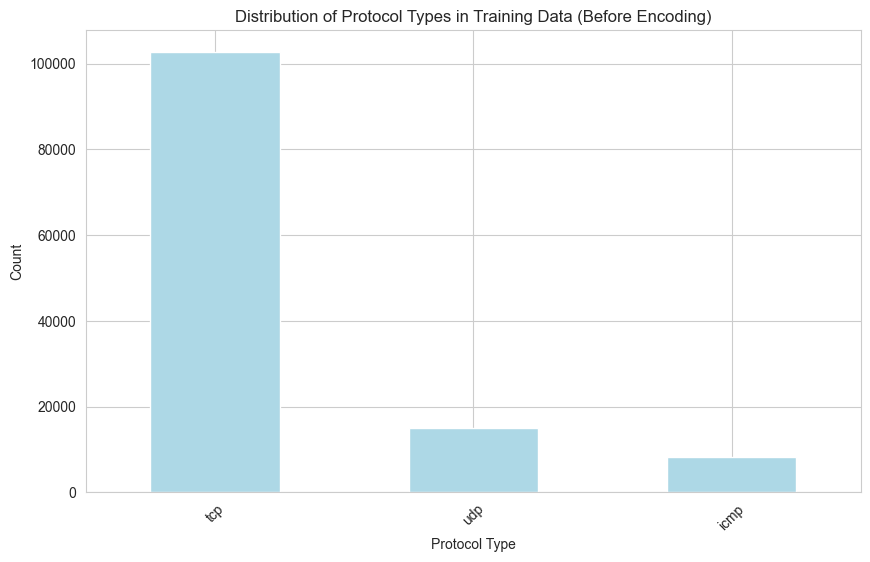

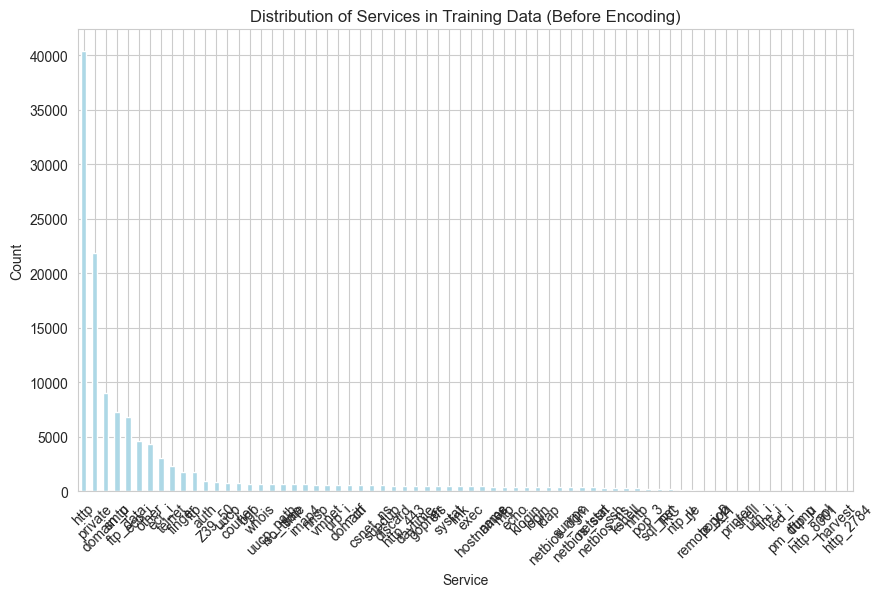

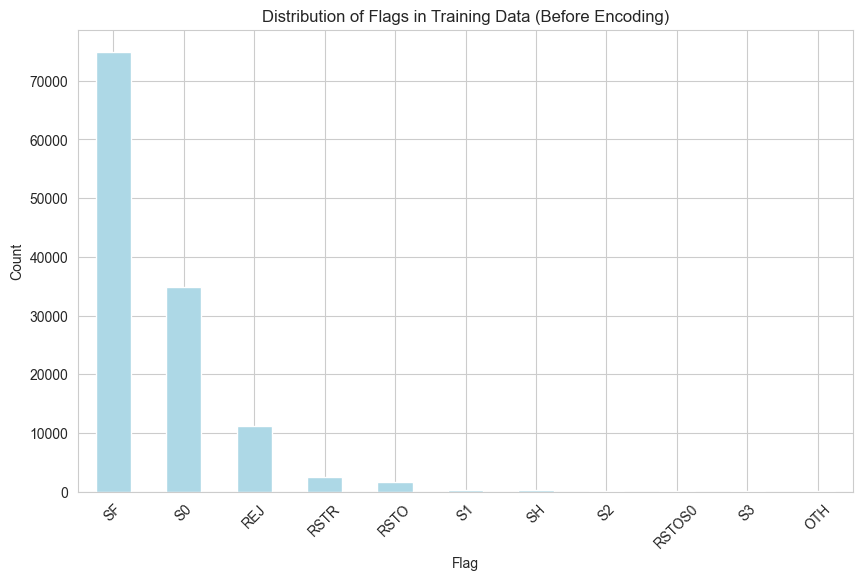

In [22]:
# Plot the distribution of categories in the 'protocol_type' column before encoding
plt.figure(figsize=(10, 6))
df_train['protocol_type'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Protocol Types in Training Data (Before Encoding)')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of categories in the 'service' column before encoding
plt.figure(figsize=(10, 6))
df_train['service'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Services in Training Data (Before Encoding)')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of categories in the 'flag' column before encoding
plt.figure(figsize=(10, 6))
df_train['flag'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Flags in Training Data (Before Encoding)')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Apply one-hot encoding to the label-encoded categorical values in the test dataset
df_test_categorical_values_onehot_encoded = onehot_encoder.fit_transform(df_test_categorical_values_encoded)

# Convert the resulting one-hot encoded data into a DataFrame with appropriate column names
df_test_categorical_data = pd.DataFrame(df_test_categorical_values_onehot_encoded.toarray(), columns=merged_cols_test)

# Print the first 5 rows of the one-hot encoded categorical data for the test dataset
df_test_categorical_data.head()


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


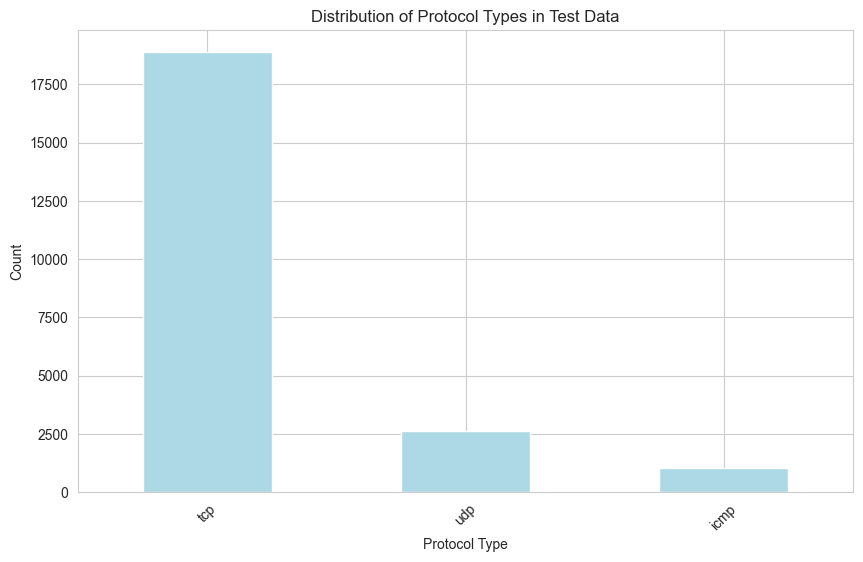

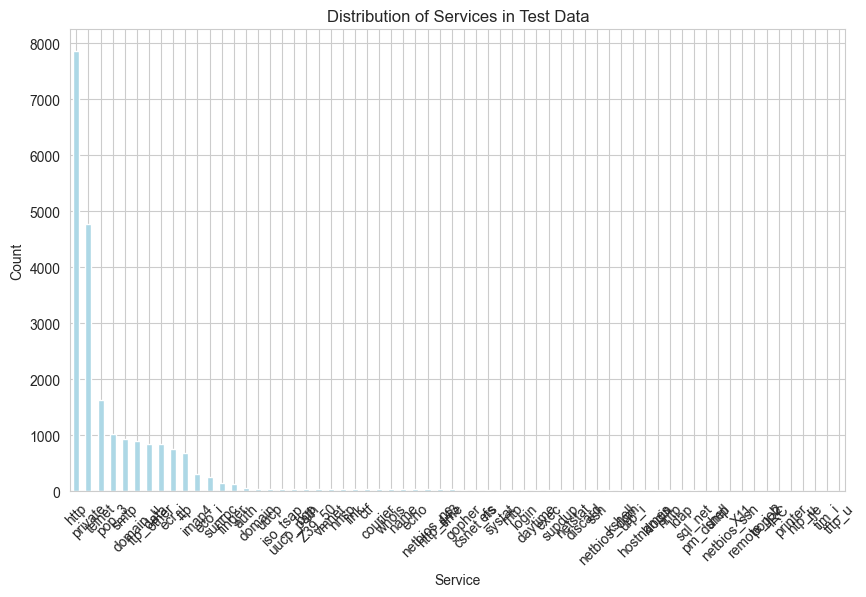

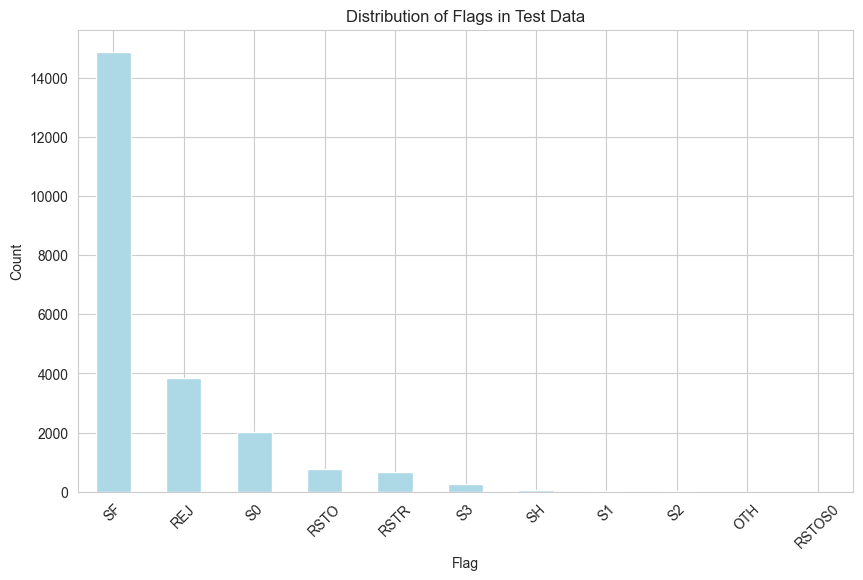

In [24]:
# Plot the distribution of categories in the 'protocol_type' column
plt.figure(figsize=(10, 6))
df_test['protocol_type'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Protocol Types in Test Data')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of categories in the 'service' column
plt.figure(figsize=(10, 6))
df_test['service'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Services in Test Data')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of categories in the 'flag' column
plt.figure(figsize=(10, 6))
df_test['flag'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Flags in Test Data')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Add Missing Columns

In [25]:
# Extract the 'service' column from the training dataset and convert it to a list
train_service = df_train["service"].tolist()

# Extract the 'service' column from the test dataset and convert it to a list
test_service = df_test["service"].tolist()

# Find the services that are in the training set but not in the test set by calculating the set difference
difference = list(set(train_service) - set(test_service))

# Add the prefix 'service_' to each service in the difference list to match the one-hot encoded column names
difference = [service_string + x for x in difference]

# Print the services that are present in the training set but not in the test set
print(difference)


['service_http_2784', 'service_urh_i', 'service_red_i', 'service_harvest', 'service_aol', 'service_http_8001']


In [26]:
# For each service in the 'difference' list (services that are in the training set but not in the test set),
# add the corresponding column to the test dataset and set its values to 0 (for one-hot encoding consistency)
for column in difference:
    df_test_categorical_data[column] = 0

# Print the shapes of the training and test datasets to verify that the test dataset now has the same number of columns as the training dataset
print(df_train_categorical_data.shape)
print(df_test_categorical_data.shape)


(125973, 84)
(22544, 84)


In [27]:
# Joining the one-hot encoded test dataset columns with the training dataset
df_train_new = df_train.join(df_test_categorical_data)

# Dropping the 'flag', 'service', and 'protocol_type' columns from the merged training dataset
df_train_new.drop("flag", axis=1, inplace=True)
df_train_new.drop("service", axis=1, inplace=True)
df_train_new.drop("protocol_type", axis=1, inplace=True)

# Printing the shape of the new training dataset after dropping the specified columns
print(df_train_new.shape)


(125973, 123)


In [28]:
# Joining the one-hot encoded categorical data columns with the test dataset
df_test_new = df_test.join(df_test_categorical_data)

# Dropping the 'flag', 'service', and 'protocol_type' columns from the merged test dataset
df_test_new.drop("flag", axis=1, inplace=True)
df_test_new.drop("service", axis=1, inplace=True)
df_test_new.drop("protocol_type", axis=1, inplace=True)

# Printing the shape of the new test dataset after dropping the specified columns
print(df_test_new.shape)


(22544, 123)


### Attack Types Encoding
> #### 0 = Normal
> #### 1 = DoS 
> #### 2 = Probe 
> #### 3 = R2L 
> #### 4 = U2R 

> **Warning:**
> 
> This notebook contains code that may trigger a `FutureWarning` related to upcoming changes in a library's behavior. The warning can be safely ignored for now, but please be aware that it might affect compatibility in future versions. To suppress this warning, you can use the following code:
> 
> ```python
> import warnings
> warnings.simplefilter(action='ignore', category=FutureWarning)
> ```
> 
> However, it's recommended to keep an eye on updates to the library and adjust your code when the new version is released.


In [29]:
# Extracting the 'label' column from the training and test datasets
df_train_label = df_train_new["label"]
df_test_label = df_test_new["label"]

# Defining the categories of attacks (0 - normal, 1 - DOS, 2 - Probe, 3 - R2L, 4 - U2L)
attack_categories = {
    0: ['normal'],
    1: ['dos', 'neptune', 'back', 'land', 'pod', 'smurf', 'teardrop', 'mailbomb', 
        'apache2', 'processtable', 'udpstorm', 'worm'],
    2: ['probe', 'ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
    3: ['r2l', 'ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 
        'warezclient', 'warezmaster', 'sendmail', 'named', 'snmpgetattack', 
        'snmpguess', 'xlock', 'xsnoop', 'httptunnel'],
    4: ['u2l', 'buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 
        'sqlattack', 'xterm']
}

# Create a mapping of attack names to numeric categories
attack_mapping = {attack: category for category, attacks in attack_categories.items() for attack in attacks}

# Replacing the categorical attack labels in the training and test datasets with numeric values
df_train_label_new = df_train_label.replace(attack_mapping)
df_test_label_new = df_test_label.replace(attack_mapping)

# Updating the 'label' column in both training and test datasets with the new mapped values
df_train_new["label"] = df_train_label_new
df_test_new["label"] = df_test_label_new


C:\Users\yusuf\AppData\Local\Temp\ipykernel_20044\3417025059.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_label_new = df_train_label.replace(attack_mapping)
C:\Users\yusuf\AppData\Local\Temp\ipykernel_20044\3417025059.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test_label_new = df_test_label.replace(attack_mapping)


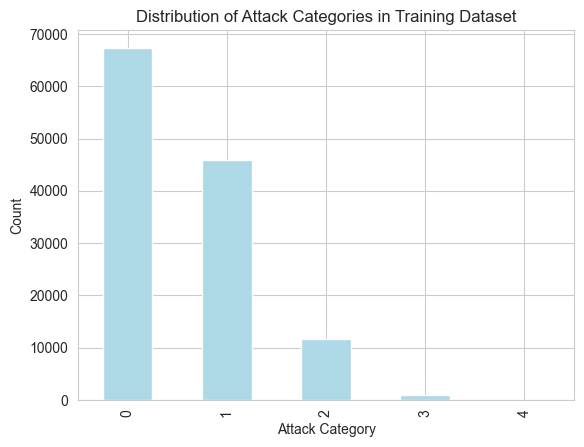

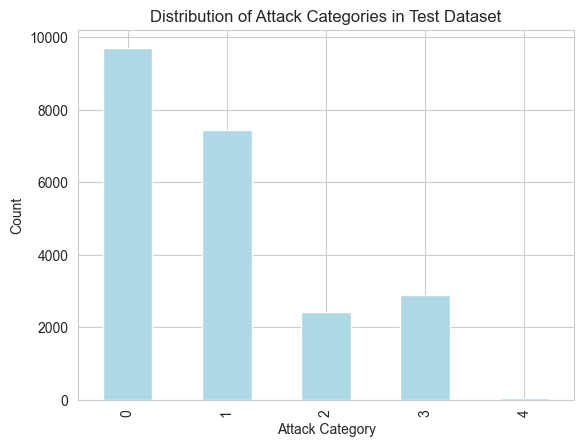

In [30]:
# Visualizing the distribution of attack categories in the training dataset
train_label_counts = df_train_new['label'].value_counts().sort_index()

# Plot the distribution of attack categories
train_label_counts.plot(kind='bar', color='lightblue')

# Add title and labels
plt.title('Distribution of Attack Categories in Training Dataset')
plt.xlabel('Attack Category')
plt.ylabel('Count')

# Show the plot
plt.show()

# Visualizing the distribution of attack categories in the test dataset
test_label_counts = df_test_new['label'].value_counts().sort_index()

# Plot the distribution of attack categories
test_label_counts.plot(kind='bar', color='lightblue')

# Add title and labels
plt.title('Distribution of Attack Categories in Test Dataset')
plt.xlabel('Attack Category')
plt.ylabel('Count')

# Show the plot
plt.show()


### Filtering

In [31]:
# Filtering the training data by specific attack categories to create separate DataFrames for each attack type
# Label categories 0 (normal) and 1 (DOS) for filtering DOS attacks
to_drop_dos = [0, 1]   
# Label categories 0 (normal) and 2 (Probe) for filtering Probe attacks
to_drop_probe = [0, 2] 
# Label categories 0 (normal) and 3 (R2L) for filtering R2L attacks
to_drop_r2l = [0, 3]   
# Label categories 0 (normal) and 4 (U2L) for filtering U2L attacks
to_drop_u2r = [0, 4]   

# Creating separate DataFrames for each attack category in the training set
dos_df_train   = df_train_new[df_train_new["label"].isin(to_drop_dos)]
probe_df_train = df_train_new[df_train_new["label"].isin(to_drop_probe)]
r2l_df_train   = df_train_new[df_train_new["label"].isin(to_drop_r2l)]
u2r_df_train   = df_train_new[df_train_new["label"].isin(to_drop_u2r)]

# Creating separate DataFrames for each attack category in the test set
dos_df_test    = df_test_new[df_test_new["label"].isin(to_drop_dos)]
probe_df_test  = df_test_new[df_test_new["label"].isin(to_drop_probe)]
r2l_df_test    = df_test_new[df_test_new["label"].isin(to_drop_r2l)]
u2r_df_test    = df_test_new[df_test_new["label"].isin(to_drop_u2r)]


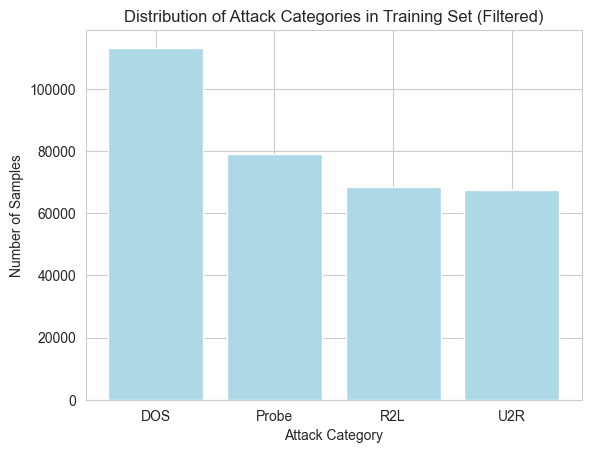

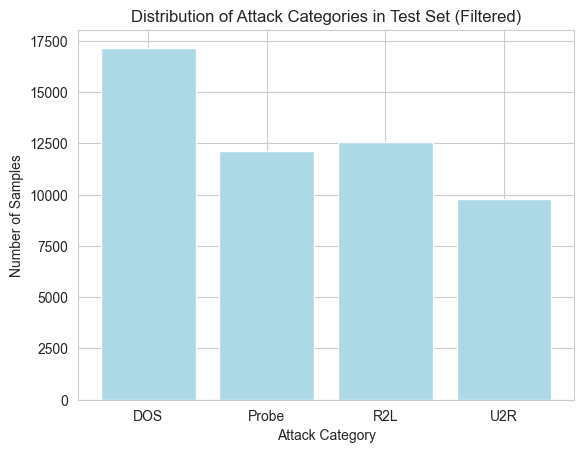

In [32]:
# Visualizing the number of samples for each attack category after filtering in the training set
filtered_train_label_counts = {
    "DOS": dos_df_train.shape[0],
    "Probe": probe_df_train.shape[0],
    "R2L": r2l_df_train.shape[0],
    "U2R": u2r_df_train.shape[0]
}

# Plot the distribution of attack categories in the filtered training set
plt.bar(filtered_train_label_counts.keys(), filtered_train_label_counts.values(), color='lightblue')
plt.title('Distribution of Attack Categories in Training Set (Filtered)')
plt.xlabel('Attack Category')
plt.ylabel('Number of Samples')
plt.show()

# Visualizing the number of samples for each attack category after filtering in the test set
filtered_test_label_counts = {
    "DOS": dos_df_test.shape[0],
    "Probe": probe_df_test.shape[0],
    "R2L": r2l_df_test.shape[0],
    "U2R": u2r_df_test.shape[0]
}

# Plot the distribution of attack categories in the filtered test set
plt.bar(filtered_test_label_counts.keys(), filtered_test_label_counts.values(), color='lightblue')
plt.title('Distribution of Attack Categories in Test Set (Filtered)')
plt.xlabel('Attack Category')
plt.ylabel('Number of Samples')
plt.show()


In [33]:
# Printing the dimensions of the filtered datasets for training and testing
print("Train Dimensions:")
print("DoS: " , dos_df_train.shape)
print("Probe: " , probe_df_train.shape)
print("R2L: " , r2l_df_train.shape)
print("U2R: " , u2r_df_train.shape)

# Printing the dimensions of the filtered datasets for testing
print("Test Dimensions:")
print("DoS: " , dos_df_test.shape)
print("Probe: " , probe_df_test.shape)
print("R2L: " , r2l_df_test.shape)
print("U2R: " , u2r_df_test.shape)

Train Dimensions:
DoS:  (113270, 123)
Probe:  (78999, 123)
R2L:  (68338, 123)
U2R:  (67395, 123)
Test Dimensions:
DoS:  (17171, 123)
Probe:  (12132, 123)
R2L:  (12596, 123)
U2R:  (9778, 123)


### Spliting DataFrames Into Features and Labels

In [34]:
# Splitting the DataFrames into features (X) and labels (Y) for each attack category in both train and test sets

# For DoS attack category
# Features (X) - dropping the label column
X_dos_train = dos_df_train.drop("label", axis=1) 
# Labels (Y) - the label column
Y_dos_train = dos_df_train.label  
# Features (X) for test set
X_dos_test = dos_df_test.drop("label", axis=1)  
# Labels (Y) for test set
Y_dos_test = dos_df_test.label  

# For Probe attack category
# Features (X) - dropping the label column
X_probe_train = probe_df_train.drop("label", axis=1)  
# Labels (Y) - the label column
Y_probe_train = probe_df_train.label  
# Features (X) for test set
X_probe_test = probe_df_test.drop("label", axis=1) 
# Labels (Y) for test set
Y_probe_test = probe_df_test.label  

# For R2L attack category
# Features (X) - dropping the label column
X_r2l_train = r2l_df_train.drop("label", axis=1)  
# Labels (Y) - the label column
Y_r2l_train = r2l_df_train.label  
# Features (X) for test set
X_r2l_test = r2l_df_test.drop("label", axis=1)  
# Labels (Y) for test set
Y_r2l_test = r2l_df_test.label 

# For U2R attack category
# Features (X) - dropping the label column
X_u2r_train = u2r_df_train.drop("label", axis=1)  
# Labels (Y) - the label column
Y_u2r_train = u2r_df_train.label  
# Features (X) for test set
X_u2r_test = u2r_df_test.drop("label", axis=1)  
# Labels (Y) for test set
Y_u2r_test = u2r_df_test.label  


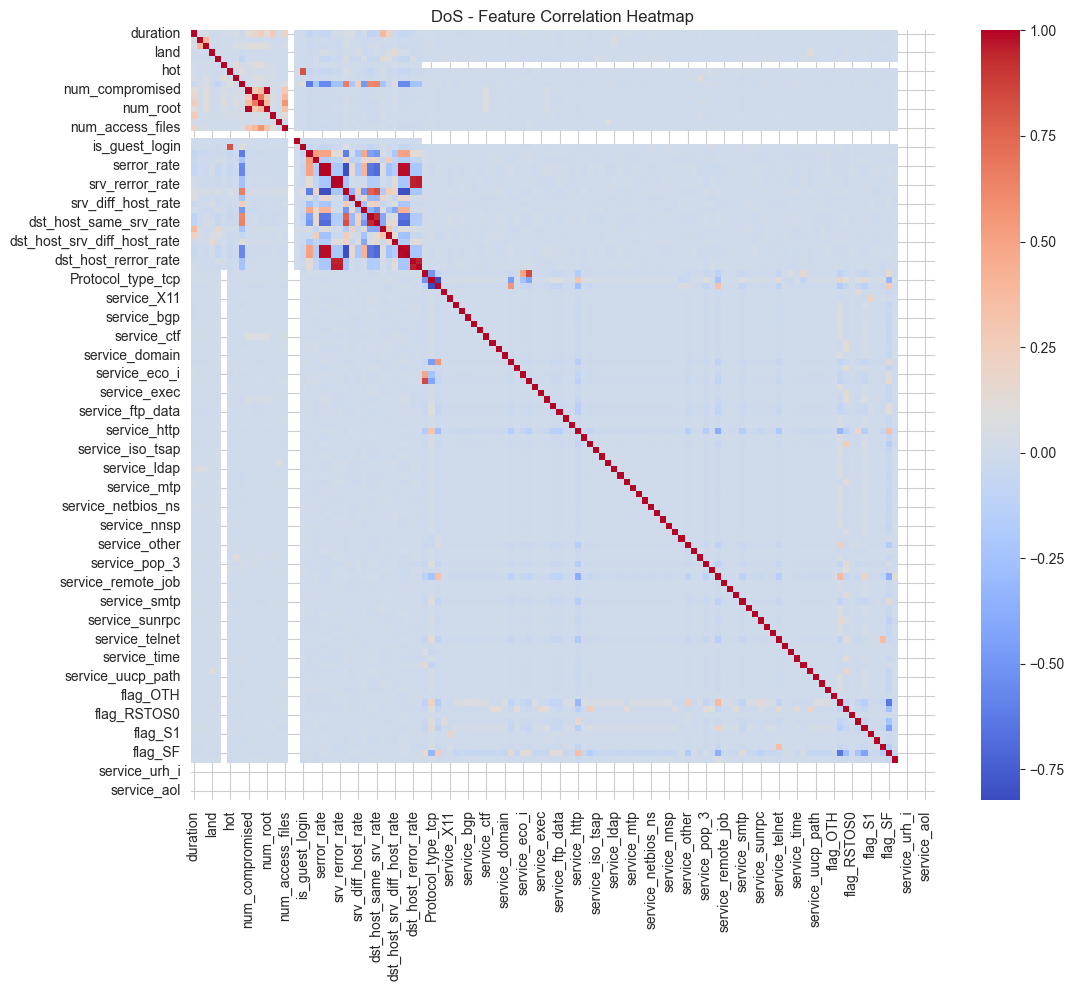

In [35]:
# Heatmap for DoS training features
plt.figure(figsize=(12, 10))
sns.heatmap(X_dos_train.corr(), cmap='coolwarm', annot=False)
plt.title("DoS - Feature Correlation Heatmap")
plt.show()

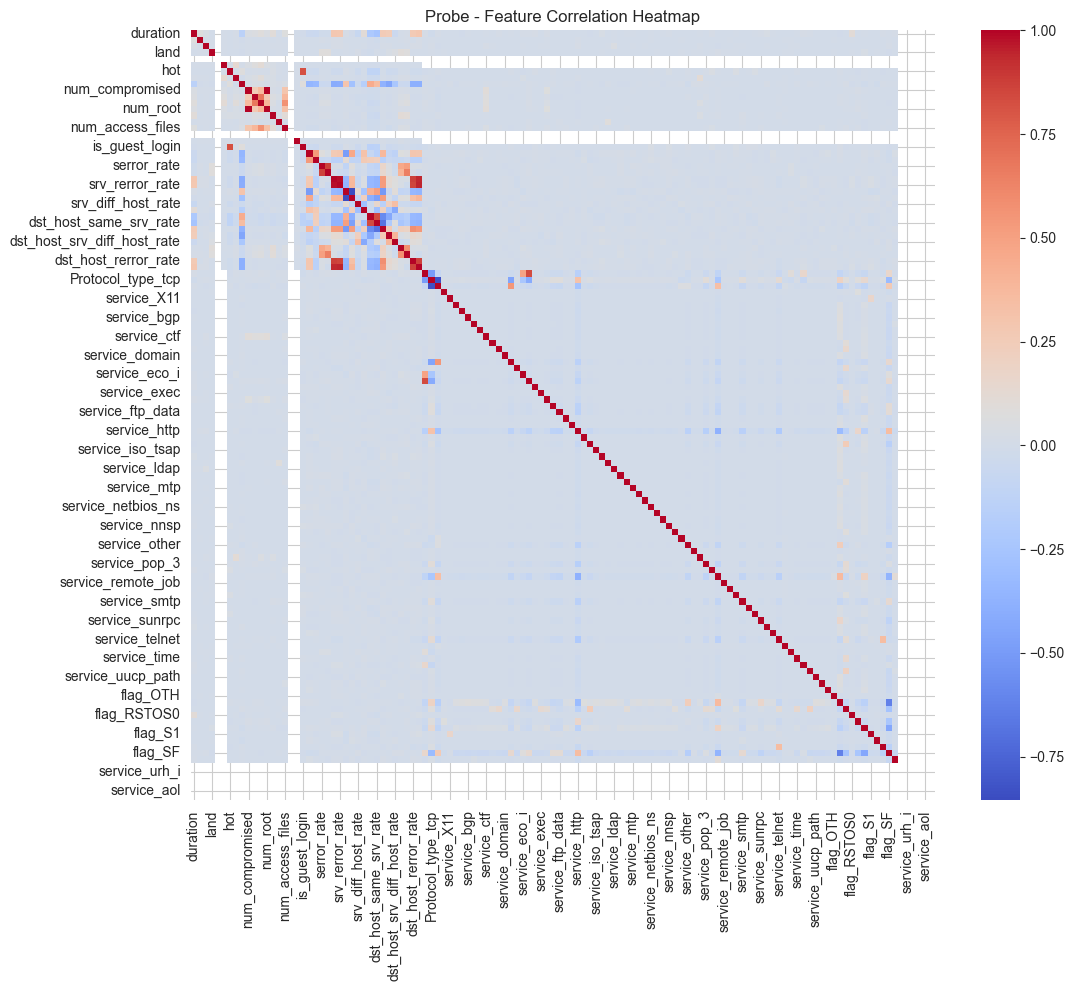

In [36]:
# Heatmap for DoS training features
plt.figure(figsize=(12, 10))
sns.heatmap(X_probe_train.corr(), cmap='coolwarm', annot=False)
plt.title("Probe - Feature Correlation Heatmap")
plt.show()

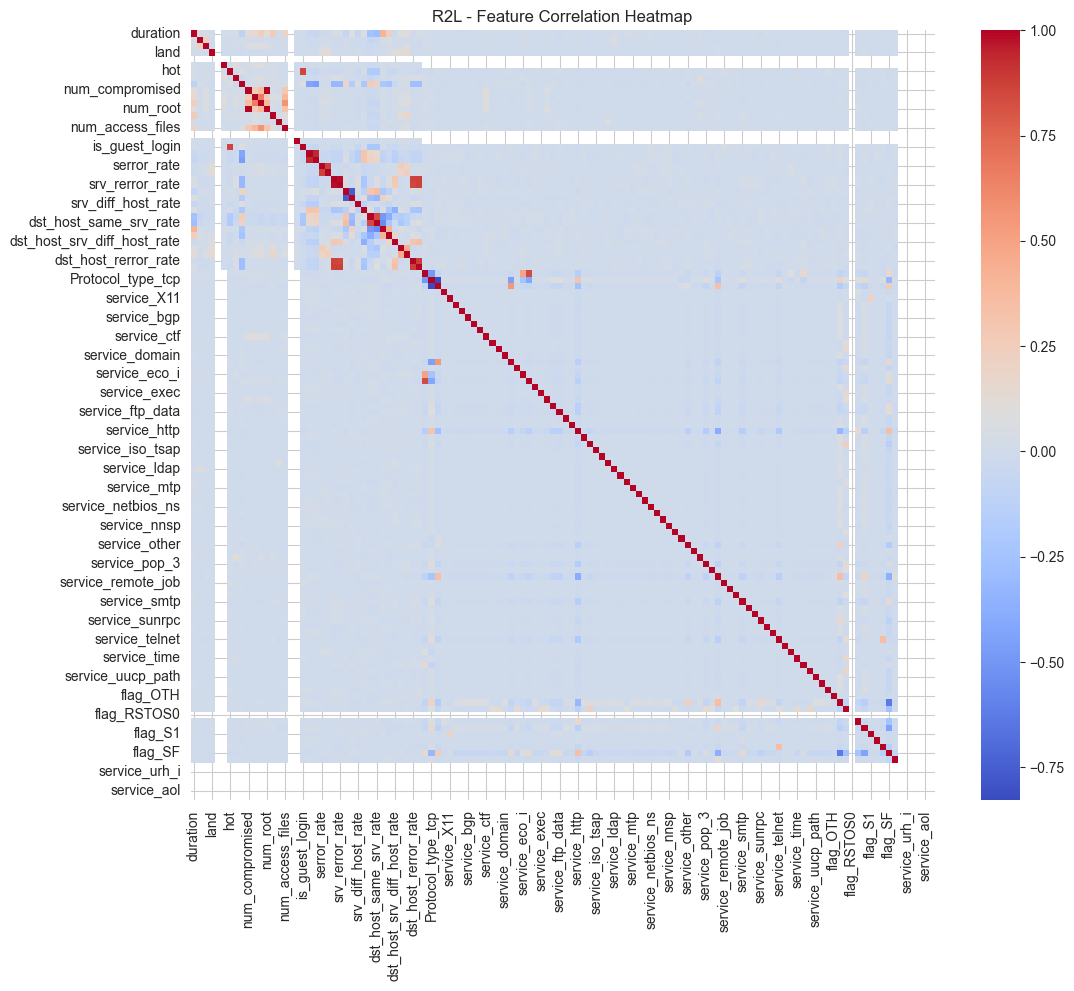

In [37]:
# Heatmap for DoS training features
plt.figure(figsize=(12, 10))
sns.heatmap(X_r2l_train.corr(), cmap='coolwarm', annot=False)
plt.title("R2L - Feature Correlation Heatmap")
plt.show()

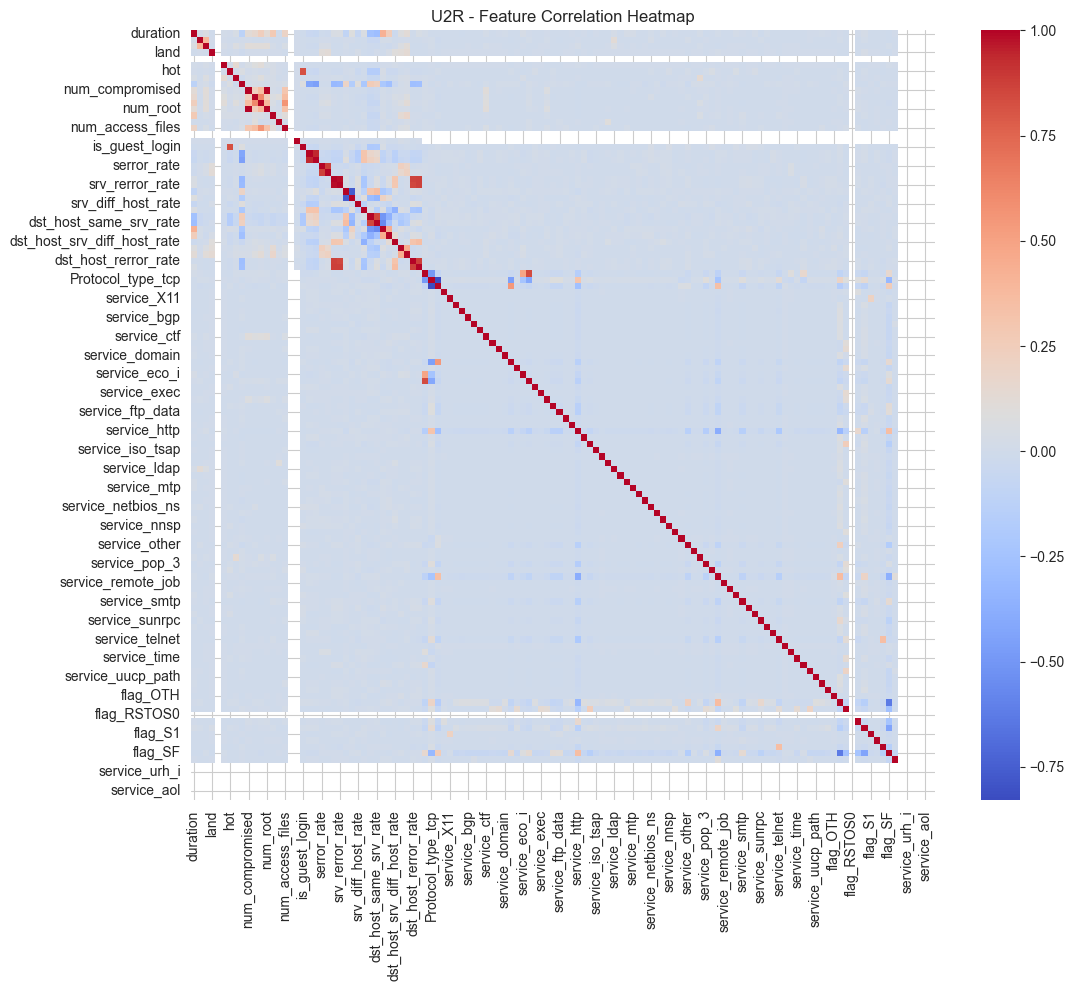

In [38]:
# Heatmap for DoS training features
plt.figure(figsize=(12, 10))
sns.heatmap(X_u2r_train.corr(), cmap='coolwarm', annot=False)
plt.title("U2R - Feature Correlation Heatmap")
plt.show()

In [39]:
# Get column names from the training dataset
column_names_train = list(X_dos_train)

# Get column names from the testing dataset
column_names_test = list(X_dos_train)

column_names_train

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'Protocol_type_tcp',
 'Protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 's

In [40]:
from sklearn.preprocessing import StandardScaler

# Standardize the training data
scaler = StandardScaler()
X_dos_train = scaler.fit_transform(X_dos_train)
X_probe_train = scaler.fit_transform(X_probe_train)
X_r2l_train = scaler.fit_transform(X_r2l_train)
X_u2r_train = scaler.fit_transform(X_u2r_train)

# Standardize the test data using the scaler fitted on training data
X_dos_test = scaler.transform(X_dos_test)
X_probe_test = scaler.transform(X_probe_test)
X_r2l_test = scaler.transform(X_r2l_test)
X_u2r_test = scaler.transform(X_u2r_test)


In [41]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
# Using the strategy='mean' to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')  

# Apply the imputer to each dataset
# For each dataset, the imputer calculates the mean and fills missing values
X_dos_train = imputer.fit_transform(X_dos_train)
X_probe_train = imputer.fit_transform(X_probe_train)
X_r2l_train = imputer.fit_transform(X_r2l_train)
X_u2r_train = imputer.fit_transform(X_u2r_train)


### Feature Selection



In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with 10 estimators and 2 jobs for parallel processing
# RandomForestClassifier is a powerful algorithm used for feature selection due to its ability to evaluate feature importance
classifier = RandomForestClassifier(n_estimators=10, n_jobs=2)

# Initialize RFE (Recursive Feature Elimination) with the classifier
# RFE eliminates less important features based on the model's performance, here we select the top 13 features
rfe = RFE(estimator=classifier, n_features_to_select=13, step=1)


## DoS

In [43]:
# Fit the RFE model on the DoS training data and the corresponding labels
# Convert labels (Y_dos_train) to integer type, as RFE requires them to be in integer format
rfe.fit(X_dos_train, Y_dos_train.astype(int))

# Transform the training data by selecting only the features that were marked as important by RFE
x_rfe_dos = rfe.transform(X_dos_train)

# Get a boolean mask indicating which features are selected
true = rfe.support_

# Get the indices of the selected features
rfe_column_index_dos = [i for i, x in enumerate(true) if x]

# Get the names of the selected features using the column indices
rfe_column_name_dos = list(column_names_train[i] for i in rfe_column_index_dos)

# Print the selected feature names for DoS dataset
print("Selected features for DoS class:", rfe_column_name_dos)



Selected features for DoS class: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'count', 'srv_count', 'serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


## Probe

In [44]:
# Apply Recursive Feature Elimination (RFE) with RandomForestClassifier to select important features for 'Probe' class

# Fit the RFE model on training data (X_probe_train and Y_probe_train)
rfe.fit(X_probe_train, Y_probe_train.astype(int))

# Transform the data to only include the selected features
x_rfe_probe = rfe.transform(X_probe_train)

# Identify which features are selected (True means feature is selected)
true = rfe.support_

# Extract the indices of selected features
rfe_column_index_probe = [i for i, x in enumerate(true) if x]

# Get the names of the selected features using the indices
rfe_column_name_probe = list(column_names_train[i] for i in rfe_column_index_probe)

# Print the selected feature names for Probe dataset
print("Selected features for Probe class:", rfe_column_name_probe)


Selected features for Probe class: ['src_bytes', 'dst_bytes', 'logged_in', 'srv_count', 'rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate']


## R2L

In [45]:
# Fit the RFE model for the R2L class and select the best 13 features based on feature importance.
rfe.fit(X_r2l_train, Y_r2l_train.astype(int))

# Transform the dataset to include only the selected features based on the RFE model.
x_rfe_r2l = rfe.transform(X_r2l_train)

# Get a boolean array indicating which features were selected by the RFE model.
true = rfe.support_

# Identify the indices of the features that were selected.
rfe_column_index_r2l = [i for i, x in enumerate(true) if x]

# Use the indices to select the feature names that were chosen by RFE.
rfe_column_name_r2l = list(column_names_train[i] for i in rfe_column_index_r2l)

# Print the selected feature names for R2L dataset
print("Selected features for R2L class:", rfe_column_name_r2l)

Selected features for R2L class: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'is_guest_login', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']


## U2R

In [46]:
# Fit the RFE model for the U2R class and select the best 13 features based on feature importance.
rfe.fit(X_u2r_train, Y_u2r_train.astype(int))

# Transform the dataset to include only the selected features based on the RFE model.
x_rfe_u2r = rfe.transform(X_u2r_train)

# Get a boolean array indicating which features were selected by the RFE model.
true = rfe.support_

# Identify the indices of the features that were selected.
rfe_column_index_u2r = [i for i, x in enumerate(true) if x]

# Use the indices to select the feature names that were chosen by RFE.
rfe_column_name_u2r = list(column_names_train[i] for i in rfe_column_index_u2r)

# Print the selected feature names for U2R dataset
print("Selected features for U2R class:", rfe_column_name_u2r)


Selected features for U2R class: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_root', 'num_file_creations', 'count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate']


In [47]:
# Print the shapes of the transformed datasets for each class (DoS, Probe, R2L, U2R) after feature selection using RFE
print(x_rfe_dos.shape)
print(x_rfe_probe.shape)
print(x_rfe_r2l.shape)
print(x_rfe_u2r.shape)


(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


### Building The Random Forest Model

In [48]:
# Building the Random Forest Classifier models for each attack type
# These models will be used for classification tasks for each category

# 10 trees, parallel jobs set to 2
# DoS (Denial of Service) classifier
classifier_dos = RandomForestClassifier(n_estimators=10, n_jobs=2)  

# Probe classifier
classifier_probe = RandomForestClassifier(n_estimators=10, n_jobs=2)

# R2L (Remote to Local) classifier
classifier_r2l = RandomForestClassifier(n_estimators=10, n_jobs=2) 

# U2R (User to Root) classifier
classifier_u2r = RandomForestClassifier(n_estimators=10, n_jobs=2) 


In [49]:
# Fit RandomForestClassifier to the DoS training data
classifier_dos.fit(X_dos_train, Y_dos_train.astype(int))

# Fit RandomForestClassifier to the Probe training data
classifier_probe.fit(X_probe_train, Y_probe_train.astype(int))

# Fit RandomForestClassifier to the R2L training data
classifier_r2l.fit(X_r2l_train, Y_r2l_train.astype(int))

# Fit RandomForestClassifier to the U2R training data
classifier_u2r.fit(X_u2r_train, Y_u2r_train.astype(int))


RandomForestClassifier(n_estimators=10, n_jobs=2)

In [50]:
# Initializing Random Forest Classifiers for each category with 10 estimators and 2 jobs
classifier_rfe_dos = RandomForestClassifier(n_estimators=10, n_jobs=2)
classifier_rfe_probe = RandomForestClassifier(n_estimators=10, n_jobs=2)
classifier_rfe_r2l = RandomForestClassifier(n_estimators=10, n_jobs=2)
classifier_rfe_u2r = RandomForestClassifier(n_estimators=10, n_jobs=2)



In [51]:
# Fitting the Random Forest classifiers with RFE-selected features for each category
classifier_rfe_dos.fit(x_rfe_dos, Y_dos_train.astype(int))
classifier_rfe_probe.fit(x_rfe_probe, Y_probe_train.astype(int))
classifier_rfe_r2l.fit(x_rfe_r2l, Y_r2l_train.astype(int))
classifier_rfe_u2r.fit(x_rfe_u2r, Y_u2r_train.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

### Prediction & Evaluation

#### DOS

In [52]:
# predict evaluation
classifier_dos.predict(X_dos_test)

array([1, 1, 0, ..., 0, 0, 0])

In [53]:
# Predict probabilities for the first 6 test samples
# The output shows the predicted probabilities for each class for the first 6 samples.
classifier_dos.predict_proba(X_dos_test)[0:6]


array([[0. , 1. ],
       [0. , 1. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0.3, 0.7],
       [0.7, 0.3]])

In [54]:
# Predicting the labels for the test set using the trained RandomForestClassifier for DoS category
y_dos_predicted = classifier_dos.predict(X_dos_test)

# Generating a confusion matrix (cross-tabulation) to compare actual vs predicted labels for the DoS category
# It shows how many predictions were correct (diagonal) and how many were misclassified (off-diagonal)
pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,8860,851
1,1547,5913


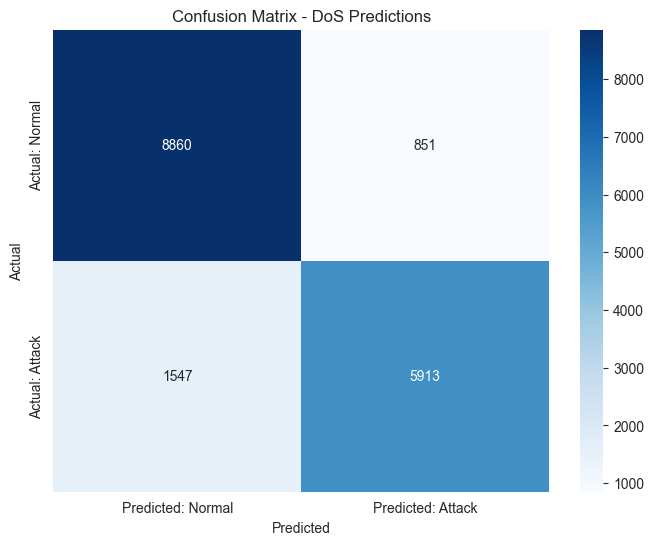

In [55]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for DoS predictions
cm_dos = confusion_matrix(Y_dos_test, y_dos_predicted)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dos, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix - DoS Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### PROBE

In [56]:
# Predicting the labels for the test set using the trained RandomForestClassifier for Probe category
y_probe_predicted = classifier_probe.predict(X_probe_test)

# Generating a confusion matrix (cross-tabulation) to compare actual vs predicted labels for the Probe category
# It shows how many predictions were correct (diagonal) and how many were misclassified (off-diagonal)
pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,2
Actual,,
0,9366,345
2,784,1637


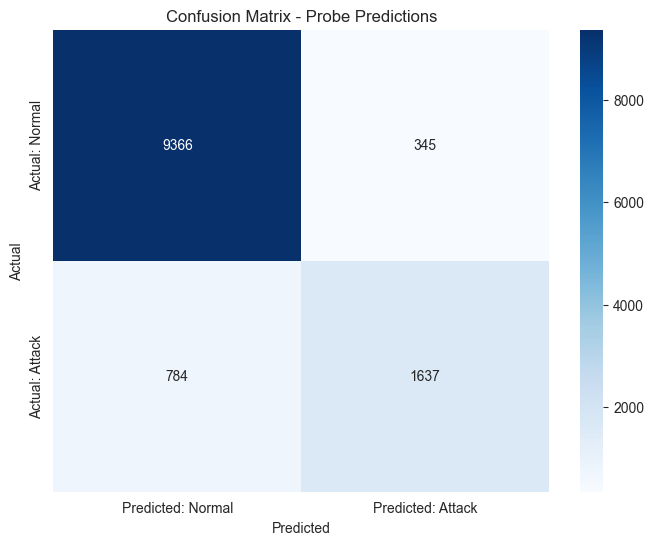

In [57]:
# Confusion matrix for Probe predictions
cm_probe = confusion_matrix(Y_probe_test, y_probe_predicted)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_probe, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix - Probe Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### R2L

In [58]:
# Predicting the labels for the test set using the trained RandomForestClassifier for R2L category
y_r2l_predicted = classifier_r2l.predict(X_r2l_test)

# Generating a confusion matrix (cross-tabulation) to compare actual vs predicted labels for the R2L category
# It shows how many predictions were correct (diagonal) and how many were misclassified (off-diagonal)
pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,3
Actual,,
0,9697,14
3,2634,251


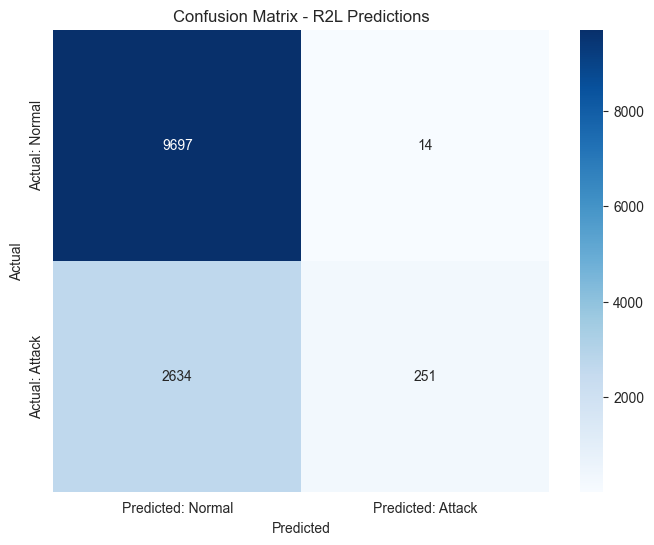

In [59]:
# Confusion matrix for R2L predictions
cm_r2l = confusion_matrix(Y_r2l_test, y_r2l_predicted)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_r2l, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix - R2L Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### U2R

In [60]:
# Predicting the labels for the test set using the trained RandomForestClassifier for U2R category
y_u2r_predicted = classifier_u2r.predict(X_u2r_test)

# Generating a confusion matrix (cross-tabulation) to compare actual vs predicted labels for the U2R category
# It shows how many predictions were correct (diagonal) and how many were misclassified (off-diagonal)
pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,4
Actual,,
0,9711,0
4,63,4


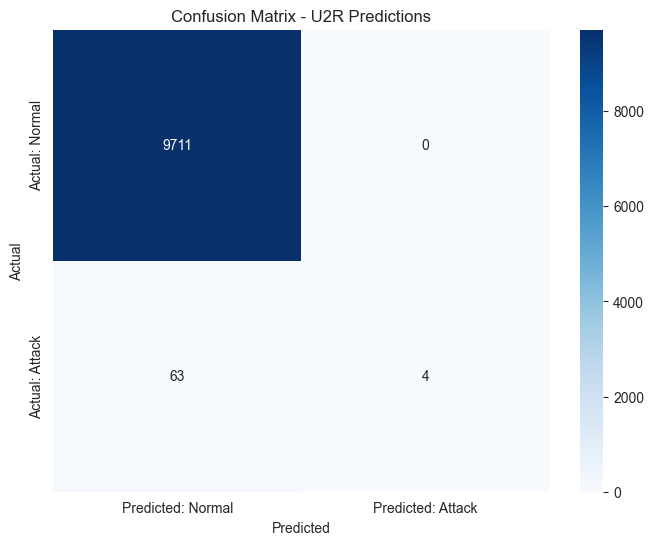

In [61]:
# Confusion matrix for U2R predictions
cm_u2r = confusion_matrix(Y_u2r_test, y_u2r_predicted)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_u2r, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix - U2R Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Accuracy, Precision, Recall, F-measure Results

#### DOS

In [62]:
from sklearn.model_selection import cross_val_score

# Evaluating the classifier for DoS category using 10-fold cross-validation and calculating accuracy
accuracy = cross_val_score(classifier_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluating the classifier for DoS category using 10-fold cross-validation and calculating precision (macro average)
precision = cross_val_score(classifier_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluating the classifier for DoS category using 10-fold cross-validation and calculating recall (macro average)
recall = cross_val_score(classifier_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluating the classifier for DoS category using 10-fold cross-validation and calculating F-measure (macro average)
f = cross_val_score(classifier_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99814 (+/- 0.00220)
Precision: 0.99830 (+/- 0.00152)
Recall: 0.99794 (+/- 0.00272)
F-measure: 0.99769 (+/- 0.00179)


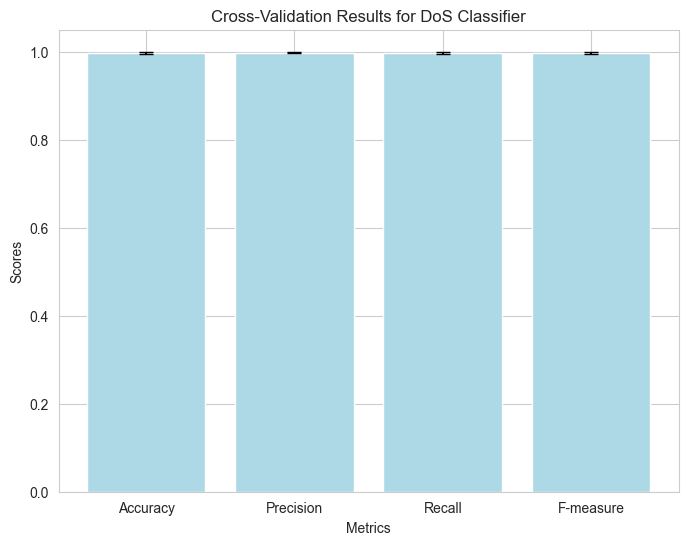

In [63]:
# Plotting cross-validation results for DoS category

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
errors = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=errors, capsize=5, color='lightblue')
plt.title('Cross-Validation Results for DoS Classifier')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


#### PROBE

In [64]:
# Evaluating the classifier for Probe category using 10-fold cross-validation and calculating accuracy
accuracy = cross_val_score(classifier_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluating the classifier for Probe category using 10-fold cross-validation and calculating precision (macro average)
precision = cross_val_score(classifier_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluating the classifier for Probe category using 10-fold cross-validation and calculating recall (macro average)
recall = cross_val_score(classifier_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluating the classifier for Probe category using 10-fold cross-validation and calculating F-measure (macro average)
f = cross_val_score(classifier_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99711 (+/- 0.00348)
Precision: 0.99587 (+/- 0.00376)
Recall: 0.99226 (+/- 0.00670)
F-measure: 0.99378 (+/- 0.00504)


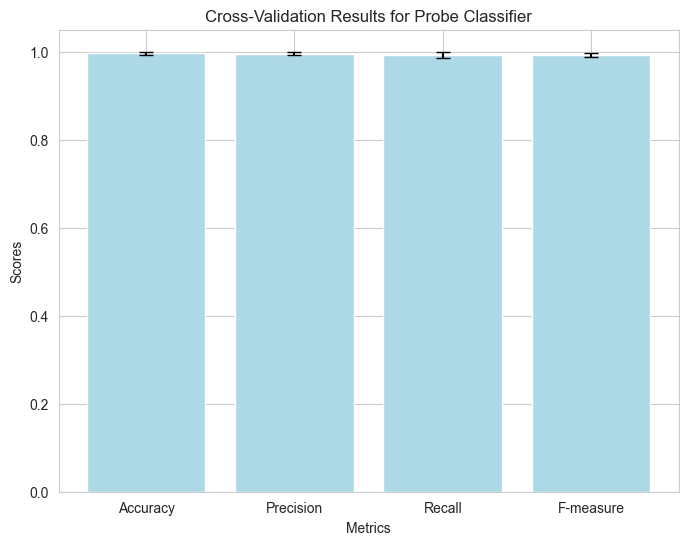

In [65]:
# Plotting cross-validation results for Probe category

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
errors = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=errors, capsize=5, color='lightblue')
plt.title('Cross-Validation Results for Probe Classifier')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


#### R2L

In [66]:
# Evaluating the classifier for R2L category using 10-fold cross-validation and calculating accuracy
accuracy = cross_val_score(classifier_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluating the classifier for R2L category using 10-fold cross-validation and calculating precision (macro average)
precision = cross_val_score(classifier_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluating the classifier for R2L category using 10-fold cross-validation and calculating recall (macro average)
recall = cross_val_score(classifier_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluating the classifier for R2L category using 10-fold cross-validation and calculating F-measure (macro average)
f = cross_val_score(classifier_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.97991 (+/- 0.00615)
Precision: 0.97414 (+/- 0.00977)
Recall: 0.96976 (+/- 0.00825)
F-measure: 0.97133 (+/- 0.01157)


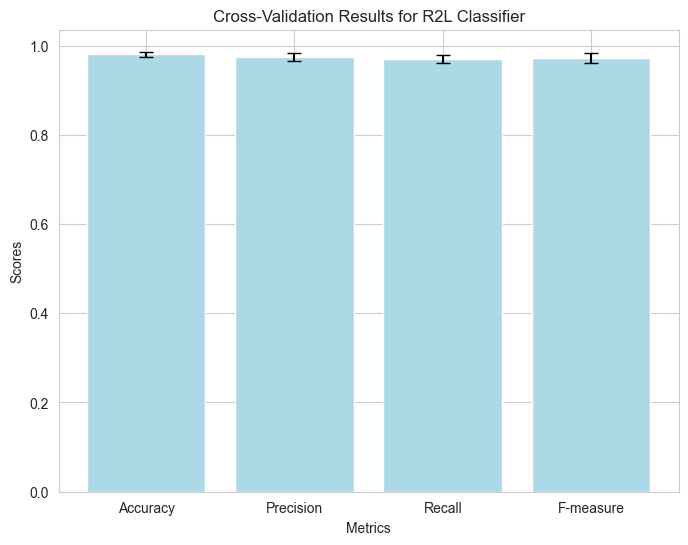

In [67]:
# Plotting cross-validation results for R2L category

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
errors = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=errors, capsize=5, color='lightblue')
plt.title('Cross-Validation Results for R2L Classifier')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


#### U2R

In [68]:
# Evaluating the classifier for U2R category using 10-fold cross-validation and calculating accuracy
accuracy = cross_val_score(classifier_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluating the classifier for U2R category using 10-fold cross-validation and calculating precision (macro average)
precision = cross_val_score(classifier_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluating the classifier for U2R category using 10-fold cross-validation and calculating recall (macro average)
recall = cross_val_score(classifier_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluating the classifier for U2R category using 10-fold cross-validation and calculating F-measure (macro average)
f = cross_val_score(classifier_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99734 (+/- 0.00245)
Precision: 0.96094 (+/- 0.09598)
Recall: 0.86651 (+/- 0.20224)
F-measure: 0.88097 (+/- 0.12617)


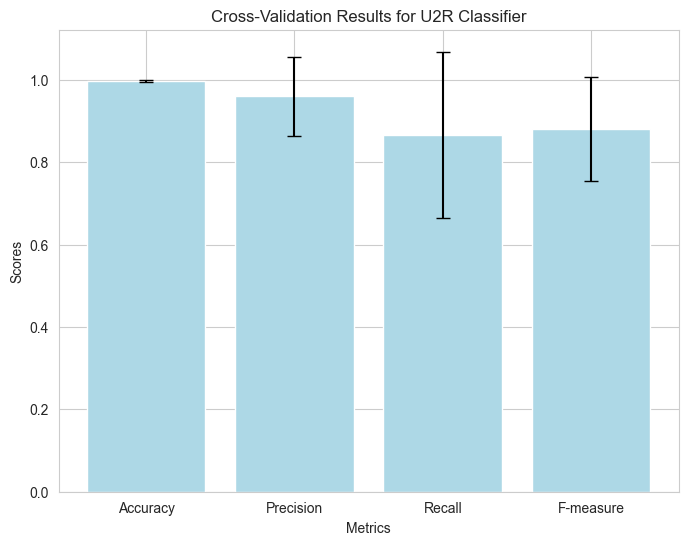

In [69]:
# Plotting cross-validation results for U2R category

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
errors = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=errors, capsize=5, color='lightblue')
plt.title('Cross-Validation Results for U2R Classifier')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


In [70]:
# Selecting only the top 13 features based on RFE for the DOS category
x_dos_test_thirteen_features = X_dos_test[:, rfe_column_index_dos]

# Selecting only the top 13 features based on RFE for the Probe category
x_probe_test_thirteen_features = X_probe_test[:, rfe_column_index_probe]

# Selecting only the top 13 features based on RFE for the R2L category
x_r2l_test_thirteen_features = X_r2l_test[:, rfe_column_index_r2l]

# Selecting only the top 13 features based on RFE for the U2R category
x_u2r_test_thirteen_features = X_u2r_test[:, rfe_column_index_u2r]



In [71]:
print("DoS:   " , x_dos_test_thirteen_features.shape)
print("Probe: " , x_probe_test_thirteen_features.shape)
print("R2L:   " ,x_r2l_test_thirteen_features.shape)
print("U2R:   " ,x_u2r_test_thirteen_features.shape)

DoS:    (17171, 13)
Probe:  (12132, 13)
R2L:    (12596, 13)
U2R:    (9778, 13)


#### DOS

In [72]:
# Predicting the labels for the test data (DOS) using the model trained with top 13 features from RFE
y_dos_predicted_thirteen_features = classifier_rfe_dos.predict(x_dos_test_thirteen_features)

# Generating the confusion matrix to compare actual vs predicted values for the DOS category
pd.crosstab(Y_dos_test, y_dos_predicted_thirteen_features, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,8932,779
1,1519,5941


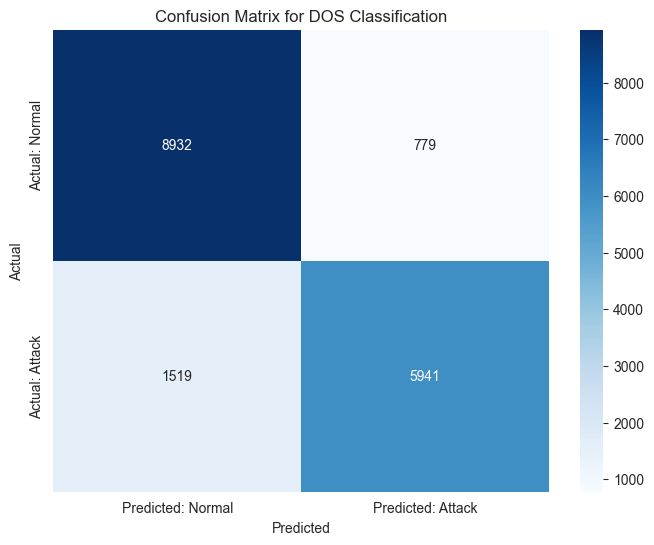

In [73]:
# Compute the confusion matrix
conf_matrix_dos = confusion_matrix(Y_dos_test, y_dos_predicted_thirteen_features)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dos, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for DOS Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### PROBE

In [74]:
# Predicting the labels for the test data (Probe) using the model trained with top 13 features from RFE
y_probe_predicted_thirteen_features = classifier_rfe_probe.predict(x_probe_test_thirteen_features)

# Generating the confusion matrix to compare actual vs predicted values for the Probe category
pd.crosstab(Y_probe_test, y_probe_predicted_thirteen_features, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,2
Actual,,
0,9172,539
2,463,1958


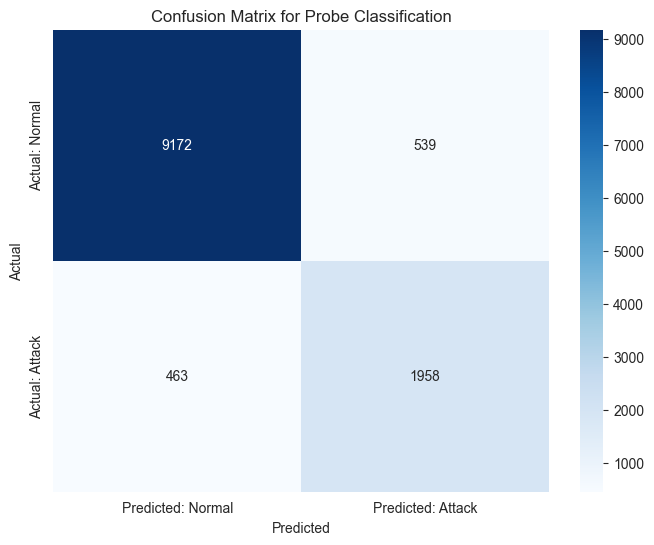

In [75]:
# Compute the confusion matrix
conf_matrix_probe = confusion_matrix(Y_probe_test, y_probe_predicted_thirteen_features)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probe, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for Probe Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### R2L

In [76]:
# Predicting the labels for the test data (R2L) using the model trained with top 13 features from RFE
y_r2l_predicted_thirteen_features = classifier_rfe_r2l.predict(x_r2l_test_thirteen_features)

# Generating the confusion matrix to compare actual vs predicted values for the R2L category
pd.crosstab(Y_r2l_test, y_r2l_predicted_thirteen_features, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,3
Actual,,
0,9710,1
3,2881,4


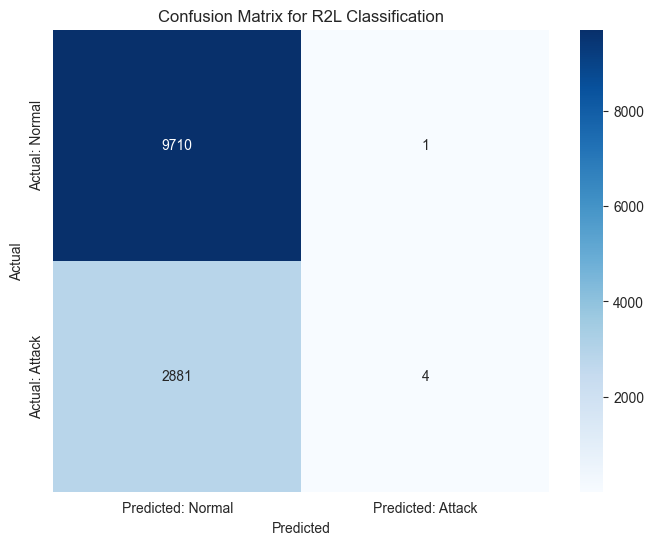

In [77]:
# Compute the confusion matrix for R2L
conf_matrix_r2l = confusion_matrix(Y_r2l_test, y_r2l_predicted_thirteen_features)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r2l, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for R2L Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### U2R

In [78]:
# Predicting the labels for the test data (U2R) using the model trained with top 13 features from RFE
y_u2r_predicted_thirteen_features = classifier_rfe_u2r.predict(x_u2r_test_thirteen_features)

# Generating the confusion matrix to compare actual vs predicted values for the U2R category
pd.crosstab(Y_u2r_test, y_u2r_predicted_thirteen_features, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,4
Actual,,
0,9711,0
4,61,6


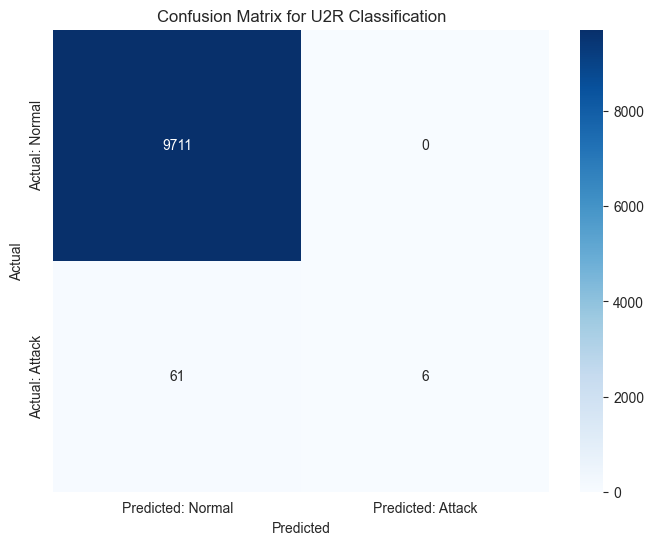

In [79]:
# Compute the confusion matrix for U2R
conf_matrix_u2r = confusion_matrix(Y_u2r_test, y_u2r_predicted_thirteen_features)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_u2r, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for U2R Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Accuracy, Precision, Recall, F-measure Results

#### DOS

In [80]:
# Performing cross-validation to evaluate the model for DOS category using selected 13 features

# Calculating the accuracy score using 10-fold cross-validation
accuracy = cross_val_score(classifier_rfe_dos, x_dos_test_thirteen_features, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Calculating the precision score using 10-fold cross-validation
precision = cross_val_score(classifier_rfe_dos, x_dos_test_thirteen_features, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Calculating the recall score using 10-fold cross-validation
recall = cross_val_score(classifier_rfe_dos, x_dos_test_thirteen_features, Y_dos_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Calculating the F-measure (F1 score) using 10-fold cross-validation
f = cross_val_score(classifier_rfe_dos, x_dos_test_thirteen_features, Y_dos_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99755 (+/- 0.00275)
Precision: 0.99808 (+/- 0.00214)
Recall: 0.99625 (+/- 0.00394)
F-measure: 0.99758 (+/- 0.00308)


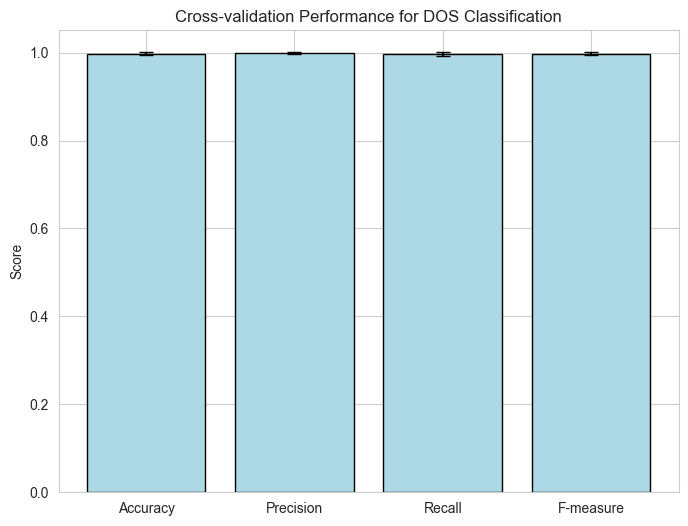

In [81]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for DOS Classification')
plt.ylabel('Score')
plt.show()


#### PROBE

In [82]:
# Performing cross-validation to evaluate the model for Probe category using selected 13 features

# Calculating the accuracy score using 10-fold cross-validation
accuracy = cross_val_score(classifier_rfe_probe, x_probe_test_thirteen_features, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Calculating the precision score using 10-fold cross-validation
precision = cross_val_score(classifier_rfe_probe, x_probe_test_thirteen_features, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Calculating the recall score using 10-fold cross-validation
recall = cross_val_score(classifier_rfe_probe, x_probe_test_thirteen_features, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Calculating the F-measure (F1 score) using 10-fold cross-validation
f = cross_val_score(classifier_rfe_probe, x_probe_test_thirteen_features, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99497 (+/- 0.00457)
Precision: 0.99149 (+/- 0.00990)
Recall: 0.99040 (+/- 0.00880)
F-measure: 0.99173 (+/- 0.00624)


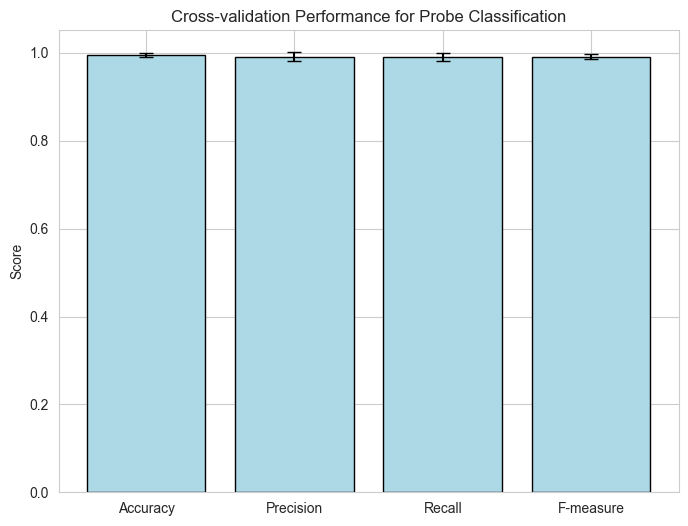

In [83]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for Probe Classification')
plt.ylabel('Score')
plt.show()


#### R2L

In [84]:
# Performing cross-validation to evaluate the model for R2L category using selected 13 features

# Calculating the accuracy score using 10-fold cross-validation
accuracy = cross_val_score(classifier_rfe_r2l, x_r2l_test_thirteen_features, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Calculating the precision score using 10-fold cross-validation
precision = cross_val_score(classifier_rfe_r2l, x_r2l_test_thirteen_features, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Calculating the recall score using 10-fold cross-validation
recall = cross_val_score(classifier_rfe_r2l, x_r2l_test_thirteen_features, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Calculating the F-measure (F1 score) using 10-fold cross-validation
f = cross_val_score(classifier_rfe_r2l, x_r2l_test_thirteen_features, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.98015 (+/- 0.00635)
Precision: 0.97345 (+/- 0.01031)
Recall: 0.96781 (+/- 0.01377)
F-measure: 0.97158 (+/- 0.01093)


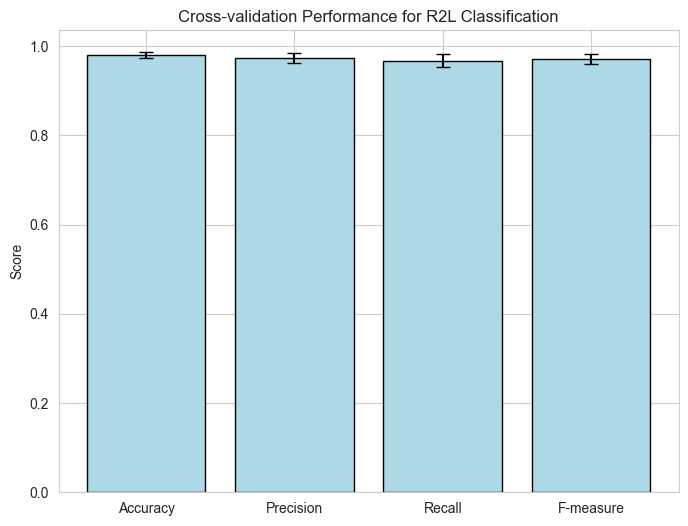

In [85]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for R2L Classification')
plt.ylabel('Score')
plt.show()


#### U2R

In [86]:
# Performing cross-validation to evaluate the model for DOS (Denial of Service) category using selected features

# Calculating the accuracy score using 10-fold cross-validation
accuracy = cross_val_score(classifier_rfe_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Calculating the precision score using 10-fold cross-validation
precision = cross_val_score(classifier_rfe_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Calculating the recall score using 10-fold cross-validation
recall = cross_val_score(classifier_rfe_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Calculating the F-measure (F1 score) using 10-fold cross-validation
f = cross_val_score(classifier_rfe_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99802 (+/- 0.00203)
Precision: 0.99823 (+/- 0.00148)
Recall: 0.99817 (+/- 0.00183)
F-measure: 0.99822 (+/- 0.00176)


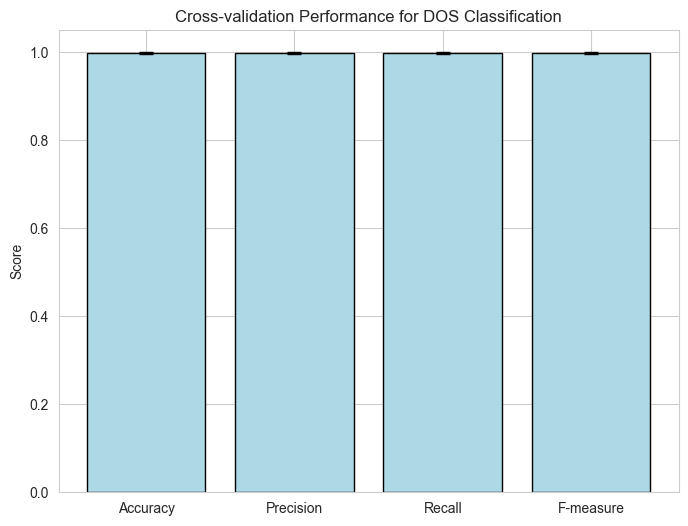

In [87]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for DOS Classification')
plt.ylabel('Score')
plt.show()


### Building The KNN Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Creating and training K-Nearest Neighbors (KNN) classifier for the DOS (Denial of Service) category
# Initialize KNN classifier with default parameters
classifier_knn_dos = KNeighborsClassifier()  
# Train on DOS training data
classifier_knn_dos.fit(X_dos_train, Y_dos_train.astype(int))  

# Creating and training KNN classifier for the Probe category
# Initialize KNN classifier with default parameters
classifier_knn_probe = KNeighborsClassifier()  
# Train on Probe training data
classifier_knn_probe.fit(X_probe_train, Y_probe_train.astype(int))  

# Creating and training KNN classifier for the R2L (Remote to Local) category
# Initialize KNN classifier with default parameters
classifier_knn_r2l = KNeighborsClassifier()  
# Train on R2L training data
classifier_knn_r2l.fit(X_r2l_train, Y_r2l_train.astype(int))  

# Creating and training KNN classifier for the U2R (User to Root) category
# Initialize KNN classifier with default parameters
classifier_knn_u2r = KNeighborsClassifier()  
# Train on U2R training data
classifier_knn_u2r.fit(X_u2r_train, Y_u2r_train.astype(int))  


KNeighborsClassifier()

#### Prediction & Evaluation


#### DOS

In [89]:
# Predict the labels for the test dataset (DOS category)
# Use the trained KNN model (classifier_knn_dos) to predict the outcomes for X_dos_test
y_dos_predicted = classifier_knn_dos.predict(X_dos_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_dos_test) with the predicted labels (y_dos_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,9020,691
1,876,6584


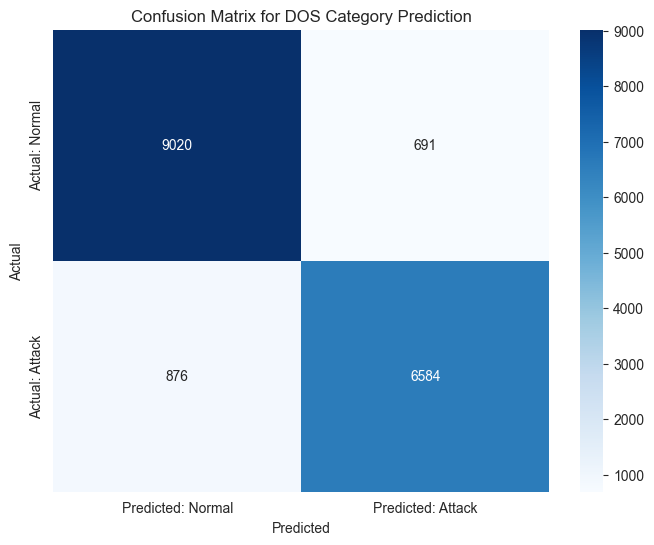

In [90]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_dos_test, y_dos_predicted)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DOS Category Prediction')

# Show the plot
plt.show()
    

#### PROBE

In [91]:
# Predict the labels for the test dataset (PROBE category)
y_probe_predicted = classifier_knn_probe.predict(X_probe_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_probe_test) with the predicted labels (y_probe_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,2
Actual,,
0,9521,190
2,547,1874


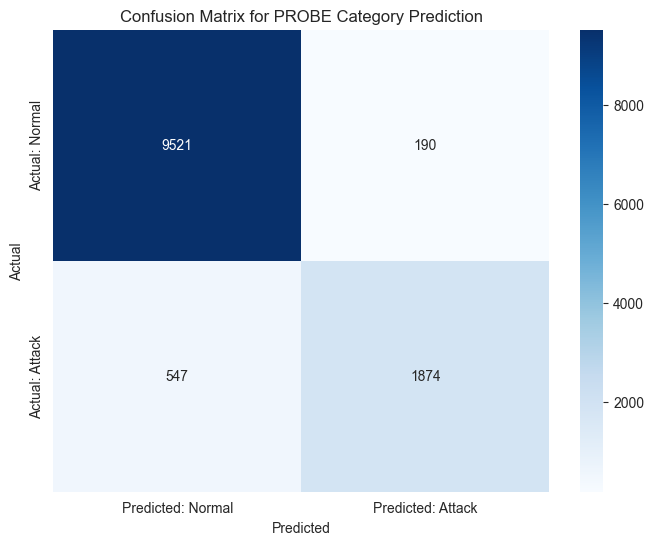

In [92]:
# Calculate the confusion matrix
conf_matrix_probe = confusion_matrix(Y_probe_test, y_probe_predicted)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probe, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for PROBE Category Prediction')

# Show the plot
plt.show()


#### R2L

In [93]:
# Predict the labels for the test dataset (R2L category)
y_r2l_predicted = classifier_knn_r2l.predict(X_r2l_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_r2l_test) with the predicted labels (y_r2l_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,3
Actual,,
0,9693,18
3,2832,53


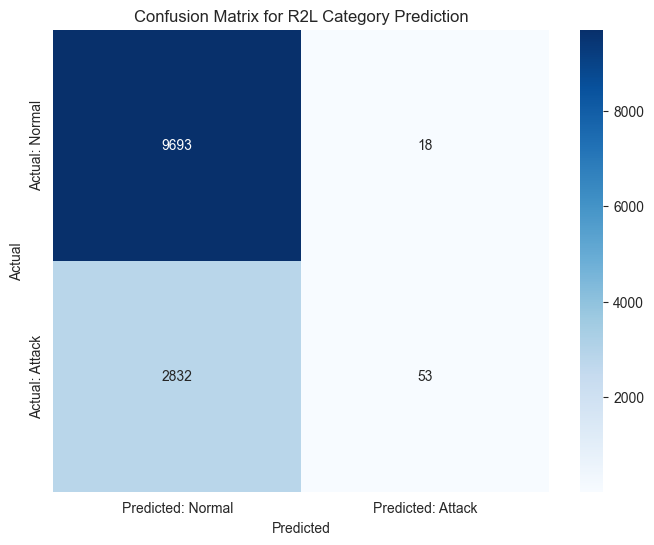

In [94]:
# Calculate the confusion matrix
conf_matrix_r2l = confusion_matrix(Y_r2l_test, y_r2l_predicted)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r2l, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for R2L Category Prediction')

# Show the plot
plt.show()


#### U2R

In [95]:
# Predict the labels for the test dataset (U2R category)
y_u2r_predicted = classifier_knn_u2r.predict(X_u2r_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_u2r_test) with the predicted labels (y_u2r_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,4
Actual,,
0,9705,6
4,48,19


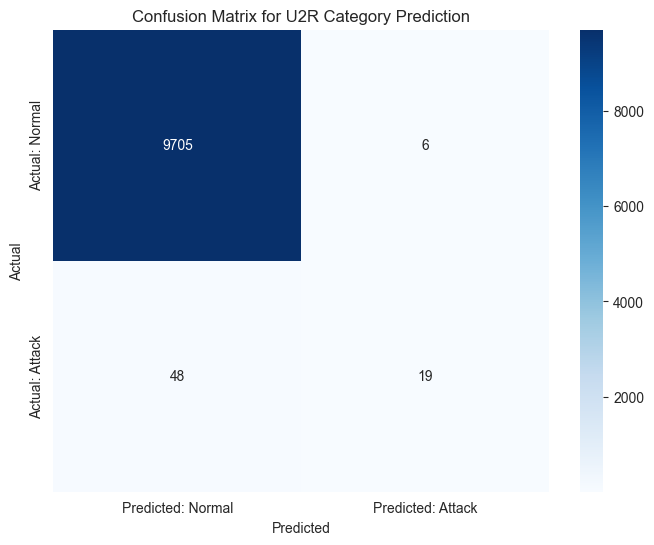

In [96]:
# Calculate the confusion matrix
conf_matrix_u2r = confusion_matrix(Y_u2r_test, y_u2r_predicted)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_u2r, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for U2R Category Prediction')

# Show the plot
plt.show()


#### Accuracy, Precision, Recall, F-measure Results

#### DOS

In [97]:
# Evaluate accuracy using cross-validation with 10 folds
accuracy = cross_val_score(classifier_knn_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate precision using cross-validation with 10 folds
precision = cross_val_score(classifier_knn_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate recall using cross-validation with 10 folds
recall = cross_val_score(classifier_knn_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate F1-score using cross-validation with 10 folds
f = cross_val_score(classifier_knn_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99575 (+/- 0.00330)
Precision: 0.99478 (+/- 0.00470)
Recall: 0.99544 (+/- 0.00401)
F-measure: 0.99511 (+/- 0.00379)


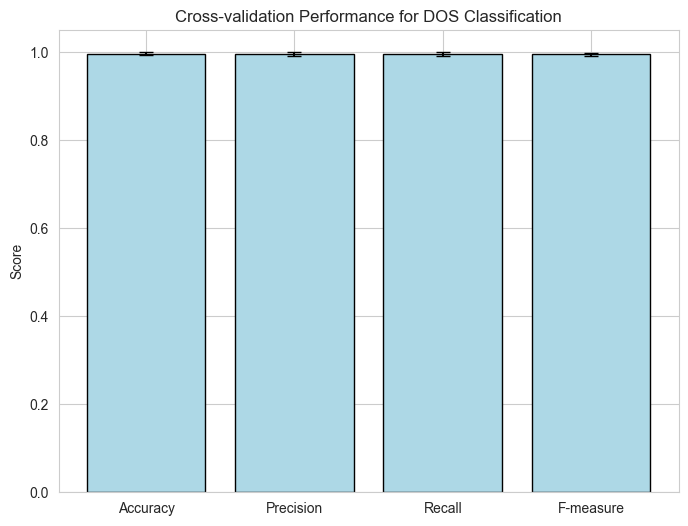

In [98]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')

# Adding titles and labels
plt.title('Cross-validation Performance for DOS Classification')
plt.ylabel('Score')

# Show the plot
plt.show()


#### PROBE

In [99]:
# Evaluate accuracy using cross-validation with 10 folds for Probe category
accuracy = cross_val_score(classifier_knn_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate precision using cross-validation with 10 folds for Probe category
precision = cross_val_score(classifier_knn_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate recall using cross-validation with 10 folds for Probe category
recall = cross_val_score(classifier_knn_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate F1-score (F-measure) using cross-validation with 10 folds for Probe category
f = cross_val_score(classifier_knn_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.98994 (+/- 0.00460)
Precision: 0.98474 (+/- 0.00464)
Recall: 0.98379 (+/- 0.01280)
F-measure: 0.98423 (+/- 0.00738)


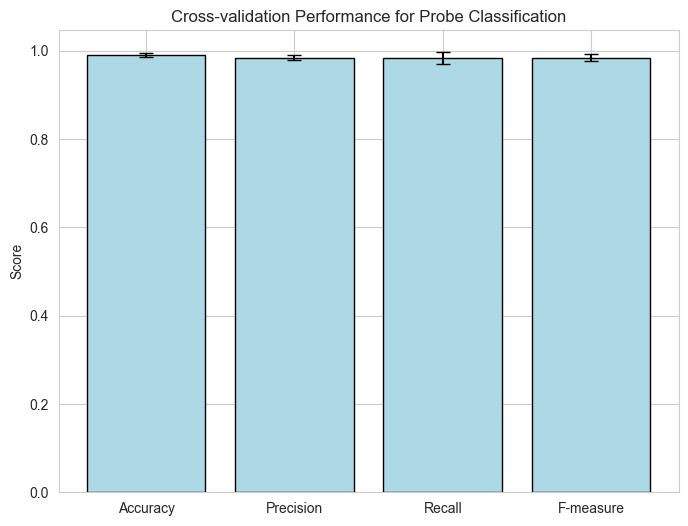

In [100]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')

# Adding titles and labels
plt.title('Cross-validation Performance for Probe Classification')
plt.ylabel('Score')

# Show the plot
plt.show()


#### R2L

In [101]:
# Evaluate accuracy using cross-validation with 10 folds for R2L category
accuracy = cross_val_score(classifier_knn_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate precision using cross-validation with 10 folds for R2L category
precision = cross_val_score(classifier_knn_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate recall using cross-validation with 10 folds for R2L category
recall = cross_val_score(classifier_knn_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate F1-score (F-measure) using cross-validation with 10 folds for R2L category
f = cross_val_score(classifier_knn_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.96848 (+/- 0.00768)
Precision: 0.95460 (+/- 0.01048)
Recall: 0.95642 (+/- 0.01489)
F-measure: 0.95545 (+/- 0.01103)


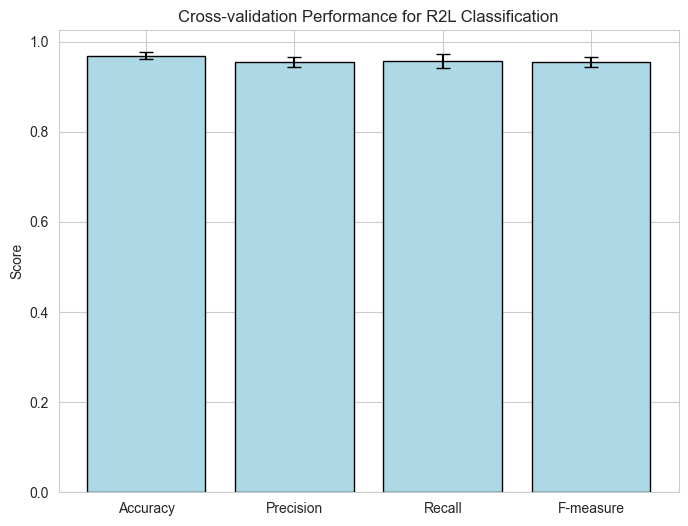

In [102]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')

# Adding titles and labels
plt.title('Cross-validation Performance for R2L Classification')
plt.ylabel('Score')

# Show the plot
plt.show()


#### U2R

In [103]:
# Evaluate accuracy using cross-validation with 10 folds for U2R category
accuracy = cross_val_score(classifier_knn_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate precision using cross-validation with 10 folds for U2R category
precision = cross_val_score(classifier_knn_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate recall using cross-validation with 10 folds for U2R category
recall = cross_val_score(classifier_knn_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate F1-score (F-measure) using cross-validation with 10 folds for U2R category
f = cross_val_score(classifier_knn_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99775 (+/- 0.00220)
Precision: 0.94499 (+/- 0.11712)
Recall: 0.89483 (+/- 0.16918)
F-measure: 0.91011 (+/- 0.10405)


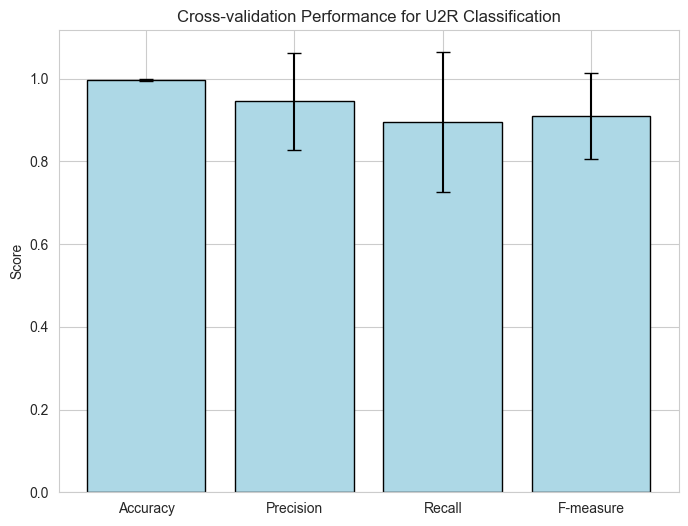

In [104]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')

# Adding titles and labels
plt.title('Cross-validation Performance for U2R Classification')
plt.ylabel('Score')

# Show the plot
plt.show()


### Building The SVM Model

In [105]:
from sklearn.svm import SVC

# SVM classifier for DOS category
# Using a linear kernel for classification, with regularization parameter C=1.0 and a fixed random state
classifier_svm_dos = SVC(kernel='linear', C=1.0, random_state=0)
# Training the classifier on the DOS training data
classifier_svm_dos.fit(X_dos_train, Y_dos_train.astype(int))

# SVM classifier for Probe category
classifier_svm_probe = SVC(kernel='linear', C=1.0, random_state=0)
# Training the classifier on the Probe training data
classifier_svm_probe.fit(X_probe_train, Y_probe_train.astype(int))

# SVM classifier for R2L category
classifier_svm_r2l = SVC(kernel='linear', C=1.0, random_state=0)
# Training the classifier on the R2L training data
classifier_svm_r2l.fit(X_r2l_train, Y_r2l_train.astype(int))

# SVM classifier for U2R category
classifier_svm_u2r = SVC(kernel='linear', C=1.0, random_state=0)
# Training the classifier on the U2R training data
classifier_svm_u2r.fit(X_u2r_train, Y_u2r_train.astype(int))


SVC(kernel='linear', random_state=0)

### Prediction and Evaluation

#### DOS

In [106]:
# Predict the labels for the test dataset (DOS category)
# Using the trained SVM classifier to predict the outcomes for the DOS test data
y_dos_predicted = classifier_svm_dos.predict(X_dos_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_dos_test) with the predicted labels (y_dos_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,7311,2400
1,983,6477


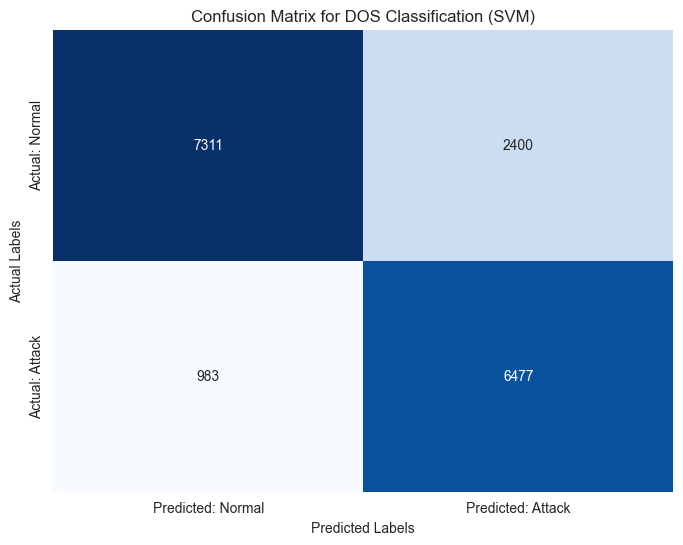

In [107]:
# Generate the confusion matrix for DOS category
conf_matrix_dos = pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dos, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for DOS Classification (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### PROBE

In [108]:
# Predict the labels for the test dataset (Probe category)
# Using the trained SVM classifier to predict the outcomes for the probe test data
y_probe_predicted = classifier_svm_probe.predict(X_probe_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_probe_test) with the predicted labels (y_probe_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,2
Actual,,
0,8899,812
2,65,2356


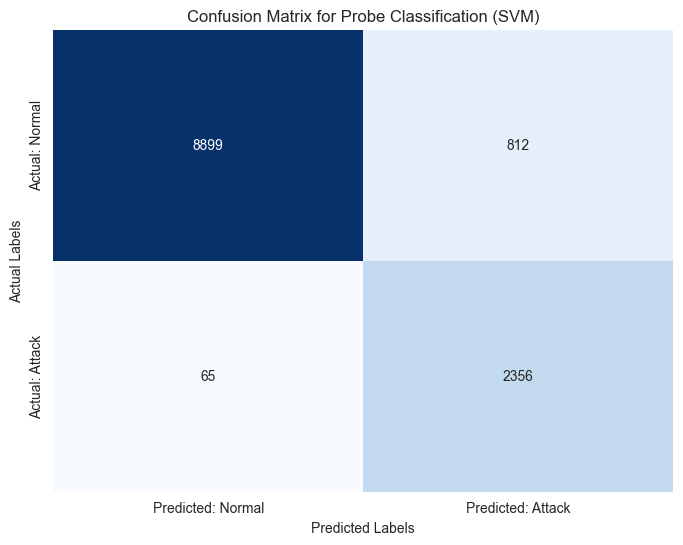

In [109]:
# Generate the confusion matrix for Probe category
conf_matrix_probe = pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probe, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for Probe Classification (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### R2L

In [110]:
# Predict the labels for the test dataset (R2L category)
# Using the trained SVM classifier to predict the outcomes for the R2L test data
y_r2l_predicted = classifier_svm_r2l.predict(X_r2l_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_r2l_test) with the predicted labels (y_r2l_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,3
Actual,,
0,9686,25
3,2855,30


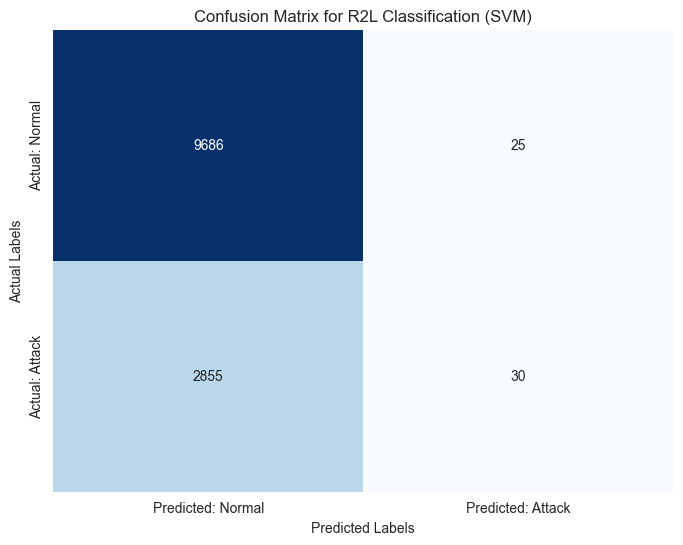

In [111]:
# Generate the confusion matrix for R2L category
conf_matrix_r2l = pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r2l, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for R2L Classification (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### U2R

In [112]:
# Predict the labels for the test dataset (U2R category)
# Using the trained SVM classifier to predict the outcomes for the U2R test data
y_u2r_predicted = classifier_svm_u2r.predict(X_u2r_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_u2r_test) with the predicted labels (y_u2r_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,4
Actual,,
0,9706,5
4,44,23


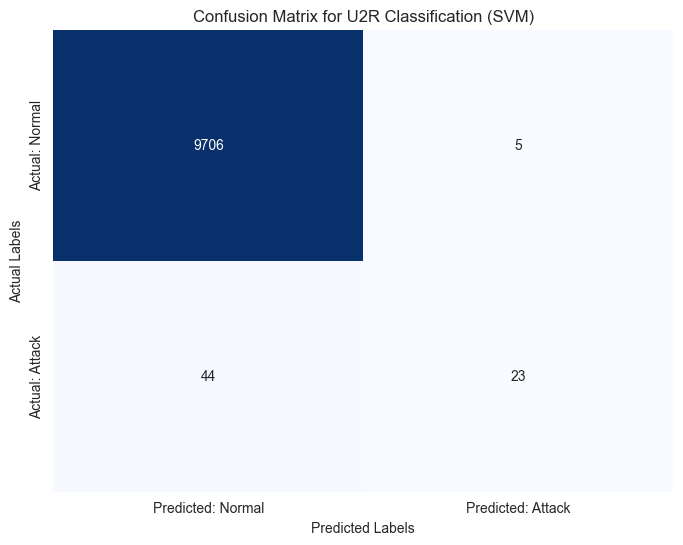

In [113]:
# Generate the confusion matrix for U2R category
conf_matrix_u2r = pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_u2r, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for U2R Classification (SVM)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### Accuracy, Precision, Recall, F-measure Results

#### DOS

In [114]:
# Calculate cross-validation score for accuracy
# The 'cv=10' argument specifies 10-fold cross-validation.
accuracy = cross_val_score(classifier_svm_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
# Print the mean and standard deviation of accuracy
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Calculate cross-validation score for precision
# 'precision' scoring metric calculates precision (positive predictive value).
precision = cross_val_score(classifier_svm_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision')
# Print the mean and standard deviation of precision
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Calculate cross-validation score for recall
# 'recall' scoring metric calculates recall (sensitivity or true positive rate).
recall = cross_val_score(classifier_svm_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall')
# Print the mean and standard deviation of recall
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Calculate cross-validation score for F1-score
# 'f1' scoring metric calculates the F1-measure (harmonic mean of precision and recall).
f = cross_val_score(classifier_svm_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1')
# Print the mean and standard deviation of F1-score
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99412 (+/- 0.00323)
Precision: 0.99120 (+/- 0.00558)
Recall: 0.99531 (+/- 0.00436)
F-measure: 0.99325 (+/- 0.00370)


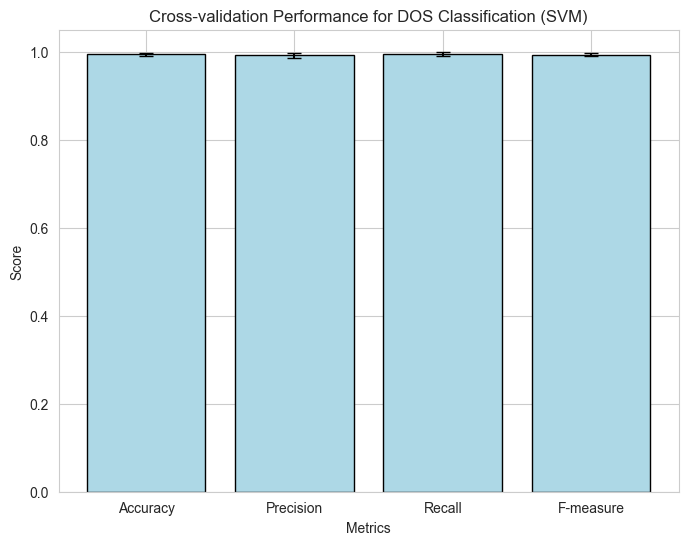

In [115]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for DOS Classification (SVM)')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()


#### PROBE

In [116]:
# Evaluate the performance of the SVM classifier using cross-validation for accuracy (Probe category)
accuracy = cross_val_score(classifier_svm_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
# Print the mean accuracy and the standard deviation
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate the precision of the classifier using cross-validation (Probe category)
precision = cross_val_score(classifier_svm_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
# Print the mean precision and the standard deviation
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate the recall of the classifier using cross-validation (Probe category)
recall = cross_val_score(classifier_svm_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
# Print the mean recall and the standard deviation
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate the F-measure (harmonic mean of precision and recall) using cross-validation (Probe category)
f = cross_val_score(classifier_svm_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
# Print the mean F-measure and the standard deviation
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.98467 (+/- 0.00431)
Precision: 0.96958 (+/- 0.00926)
Recall: 0.98360 (+/- 0.00687)
F-measure: 0.97637 (+/- 0.00657)


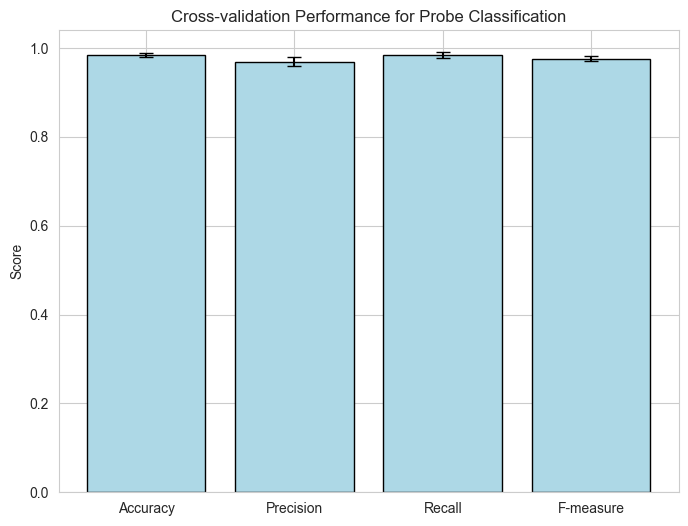

In [117]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for Probe Classification')
plt.ylabel('Score')
plt.show()


#### R2L

In [118]:
# Evaluate the performance of the SVM classifier using cross-validation for accuracy (R2L category)
accuracy = cross_val_score(classifier_svm_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
# Print the mean accuracy and the standard deviation
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate the precision of the classifier using cross-validation (R2L category)
precision = cross_val_score(classifier_svm_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
# Print the mean precision and the standard deviation
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate the recall of the classifier using cross-validation (R2L category)
recall = cross_val_score(classifier_svm_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
# Print the mean recall and the standard deviation
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate the F-measure (harmonic mean of precision and recall) using cross-validation (R2L category)
f = cross_val_score(classifier_svm_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
# Print the mean F-measure and the standard deviation
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.96769 (+/- 0.00784)
Precision: 0.94809 (+/- 0.01097)
Recall: 0.96248 (+/- 0.01385)
F-measure: 0.95498 (+/- 0.01105)


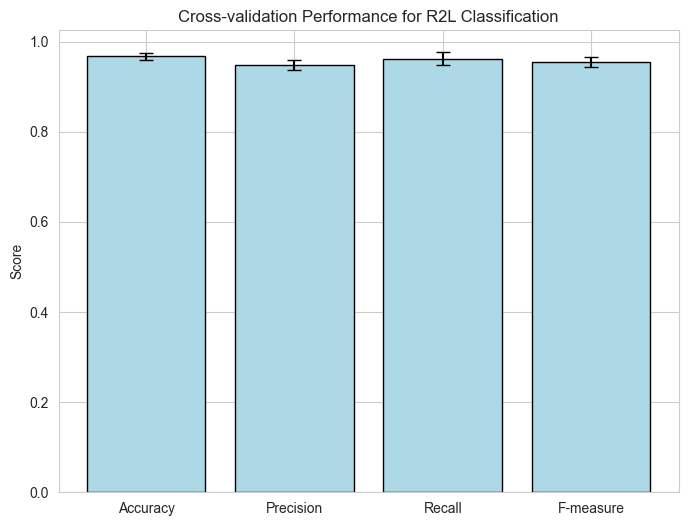

In [119]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for R2L Classification')
plt.ylabel('Score')
plt.show()


#### U2R

In [120]:
# Evaluate the performance of the SVM classifier using cross-validation for accuracy (U2R category)
accuracy = cross_val_score(classifier_svm_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
# Print the mean accuracy and the standard deviation
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Evaluate the precision of the classifier using cross-validation (U2R category)
precision = cross_val_score(classifier_svm_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
# Print the mean precision and the standard deviation
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Evaluate the recall of the classifier using cross-validation (U2R category)
recall = cross_val_score(classifier_svm_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
# Print the mean recall and the standard deviation
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Evaluate the F-measure (harmonic mean of precision and recall) using cross-validation (U2R category)
f = cross_val_score(classifier_svm_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
# Print the mean F-measure and the standard deviation
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99673 (+/- 0.00340)
Precision: 0.92703 (+/- 0.16386)
Recall: 0.82930 (+/- 0.17757)
F-measure: 0.86272 (+/- 0.14071)


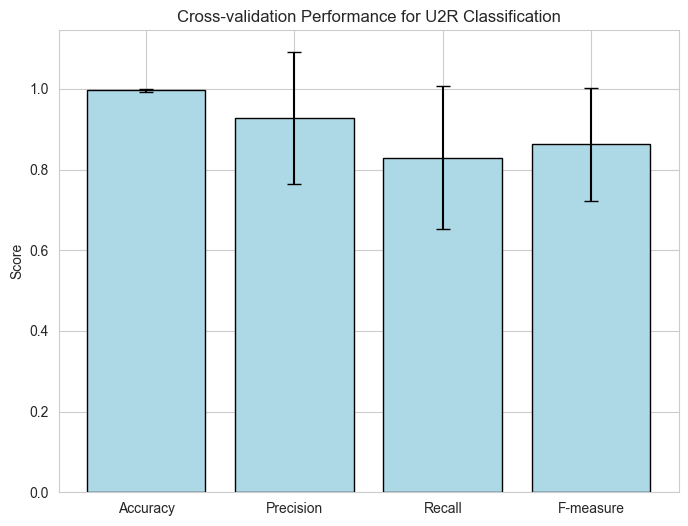

In [121]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for U2R Classification')
plt.ylabel('Score')
plt.show()


### Building The Ensemble Learning Model

In [122]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier for DOS category
# Combine RandomForest (rf), KNN (knn), and SVM (svm) classifiers using hard voting
classifier_voting_dos = VotingClassifier(estimators=[
    # RandomForest classifier for DOS
    ("rf", classifier_dos),  
    # KNN classifier for DOS
    ("knn", classifier_knn_dos), 
    # SVM classifier for DOS
    ("svm", classifier_svm_dos)],  
     # Hard voting: majority class predicted by the classifiers
    voting="hard") 
# Train the voting classifier on the DOS dataset
classifier_voting_dos.fit(X_dos_train, Y_dos_train.astype(int))  

# Voting Classifier for Probe category
# Combine RandomForest (rf), KNN (knn), and SVM (svm) classifiers for Probe category
classifier_voting_probe = VotingClassifier(estimators=[
    ("rf", classifier_probe),  
    ("knn", classifier_knn_probe), 
    ("svm", classifier_svm_probe)],  
    voting="hard")  
# Train the voting classifier on the Probe dataset
classifier_voting_probe.fit(X_dos_train, Y_dos_train.astype(int))  

# Voting Classifier for R2L category
# Combine RandomForest (rf), KNN (knn), and SVM (svm) classifiers for R2L category
classifier_voting_r2l = VotingClassifier(estimators=[
    ("rf", classifier_r2l),  
    ("knn", classifier_knn_r2l),  
    ("svm", classifier_svm_r2l)],  
    voting="hard")  
# Train the voting classifier on the R2L dataset
classifier_voting_r2l.fit(X_dos_train, Y_dos_train.astype(int))  

# Voting Classifier for U2R category
# Combine RandomForest (rf), KNN (knn), and SVM (svm) classifiers for U2R category
classifier_voting_u2r = VotingClassifier(estimators=[
    ("rf", classifier_u2r),  
    ("knn", classifier_knn_u2r),  
    ("svm", classifier_svm_u2r)],  
    voting="hard")  
# Train the voting classifier on the U2R dataset
classifier_voting_u2r.fit(X_dos_train, Y_dos_train.astype(int))  

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     n_jobs=2)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(kernel='linear', random_state=0))])

### Prediction & Evaluation

#### DOS

In [123]:
# Predict the labels for the test dataset (DOS category) using the trained voting classifier
y_dos_predicted = classifier_voting_dos.predict(X_dos_test)

# Create a confusion matrix using pandas crosstab for DOS category
# This compares the actual labels (Y_dos_test) with the predicted labels (y_dos_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,9017,694
1,1293,6167


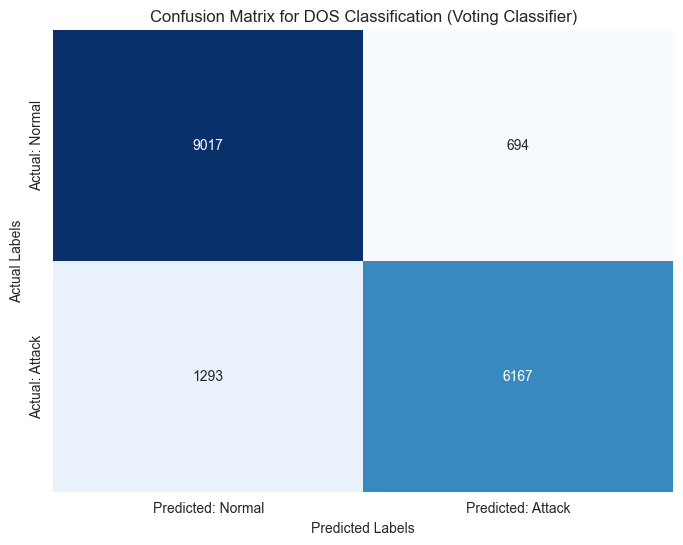

In [124]:
# Generate the confusion matrix for DOS category
conf_matrix_dos = pd.crosstab(Y_dos_test, y_dos_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dos, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for DOS Classification (Voting Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### PROBE

In [125]:
# Predicting the labels for the Probe category using the trained voting classifier
# The voting classifier combines the predictions from RF, KNN, and SVM classifiers
y_probe_predicted = classifier_voting_probe.predict(X_probe_test)

# Create a confusion matrix using pandas crosstab for the Probe category
# This compares the actual labels (Y_probe_test) with the predicted labels (y_probe_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,8916,795
2,387,2034


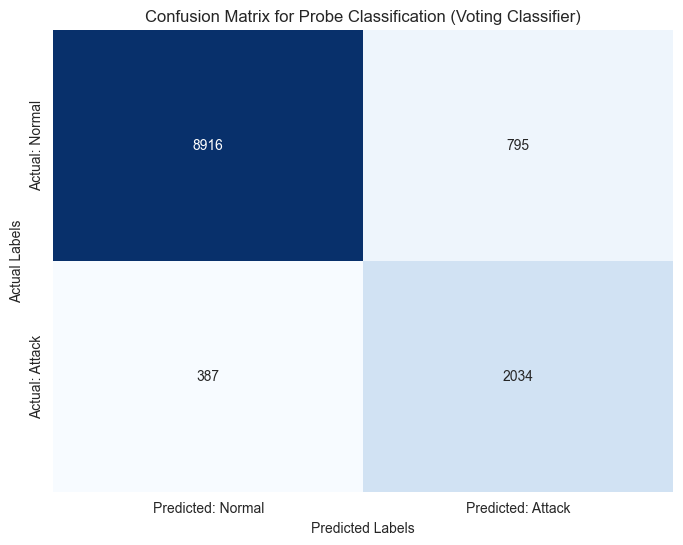

In [126]:
# Generate the confusion matrix for Probe category
conf_matrix_probe = pd.crosstab(Y_probe_test, y_probe_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_probe, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for Probe Classification (Voting Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### R2L

In [127]:
# Predict the labels for the R2L test dataset using the trained voting classifier
# The model (classifier_voting_r2l) is used to predict the outcomes for the test data
y_r2l_predicted = classifier_voting_r2l.predict(X_r2l_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual test labels (Y_r2l_test) with the predicted labels (y_r2l_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,8949,762
3,2753,132


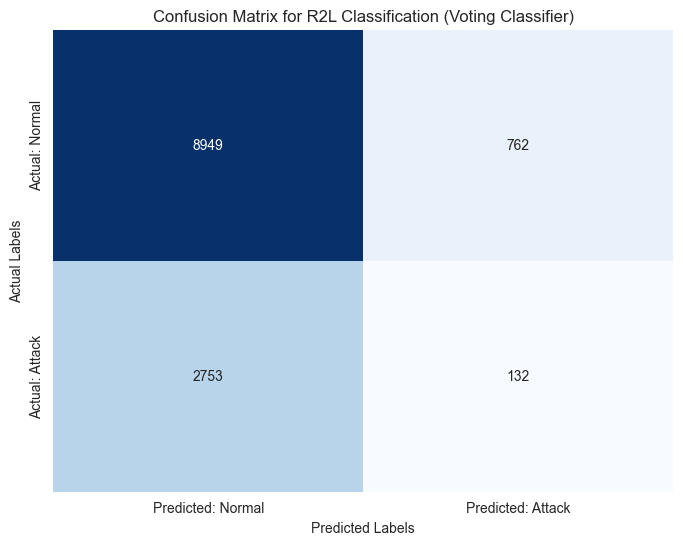

In [128]:
# Generate the confusion matrix for R2L category
conf_matrix_r2l = pd.crosstab(Y_r2l_test, y_r2l_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r2l, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for R2L Classification (Voting Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### U2R

In [129]:
# Predict the labels for the test dataset (U2R category)
# Using the trained voting classifier to predict the outcomes for the U2R test data
y_u2r_predicted = classifier_voting_u2r.predict(X_u2r_test)

# Create a confusion matrix using pandas crosstab
# This compares the actual labels (Y_u2r_test) with the predicted labels (y_u2r_predicted)
# 'Actual' and 'Predicted' are used as row and column labels for clarity
pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,8932,779
4,62,5


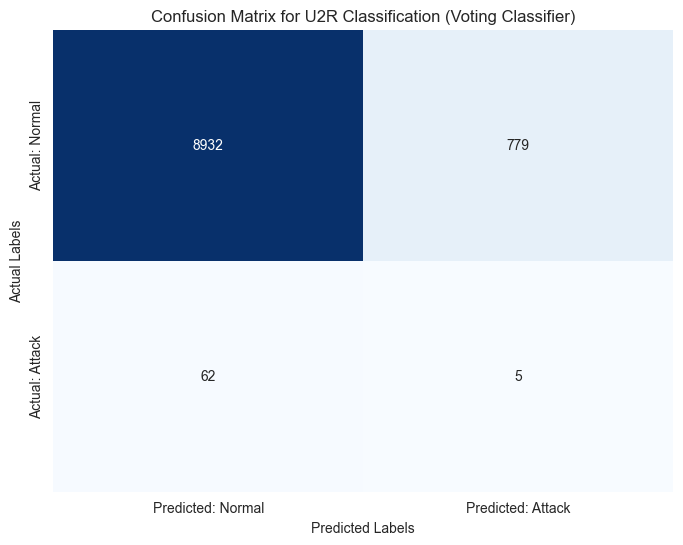

In [130]:
# Generate the confusion matrix for U2R category
conf_matrix_u2r = pd.crosstab(Y_u2r_test, y_u2r_predicted, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_u2r, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: Normal', 'Predicted: Attack'], yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title('Confusion Matrix for U2R Classification (Voting Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


#### Accuracy, Precision, Recall, F-measure Results

#### DOS

In [131]:
# Evaluate the Voting Classifier on the DOS test set using cross-validation and various metrics

# Accuracy evaluation using 10-fold cross-validation
accuracy = cross_val_score(classifier_voting_dos, X_dos_test, Y_dos_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Precision evaluation using 10-fold cross-validation
precision = cross_val_score(classifier_voting_dos, X_dos_test, Y_dos_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Recall evaluation using 10-fold cross-validation
recall = cross_val_score(classifier_voting_dos, X_dos_test, Y_dos_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# F-measure evaluation using 10-fold cross-validation
f = cross_val_score(classifier_voting_dos, X_dos_test, Y_dos_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))


Accuracy: 0.99750 (+/- 0.00221)
Precision: 0.99786 (+/- 0.00321)
Recall: 0.99678 (+/- 0.00299)
F-measure: 0.99712 (+/- 0.00233)


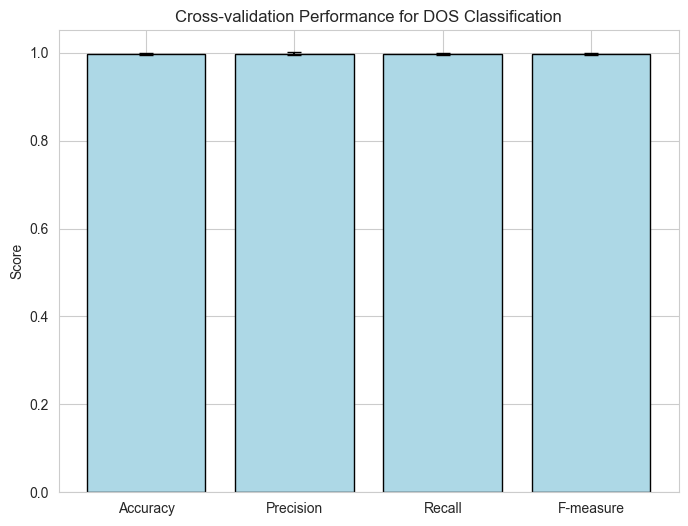

In [132]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for DOS Classification')
plt.ylabel('Score')
plt.show()


#### PROBE

In [133]:
# Evaluate the Voting Classifier on the Probe test set using cross-validation and various metrics

# Accuracy evaluation using 10-fold cross-validation
accuracy = cross_val_score(classifier_voting_probe, X_probe_test, Y_probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Precision evaluation using 10-fold cross-validation with macro averaging
precision = cross_val_score(classifier_voting_probe, X_probe_test, Y_probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Recall evaluation using 10-fold cross-validation with macro averaging
recall = cross_val_score(classifier_voting_probe, X_probe_test, Y_probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# F-measure evaluation using 10-fold cross-validation with macro averaging
f = cross_val_score(classifier_voting_probe, X_probe_test, Y_probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))



Accuracy: 0.99217 (+/- 0.00324)
Precision: 0.98697 (+/- 0.00415)
Recall: 0.98772 (+/- 0.00779)
F-measure: 0.98763 (+/- 0.00484)


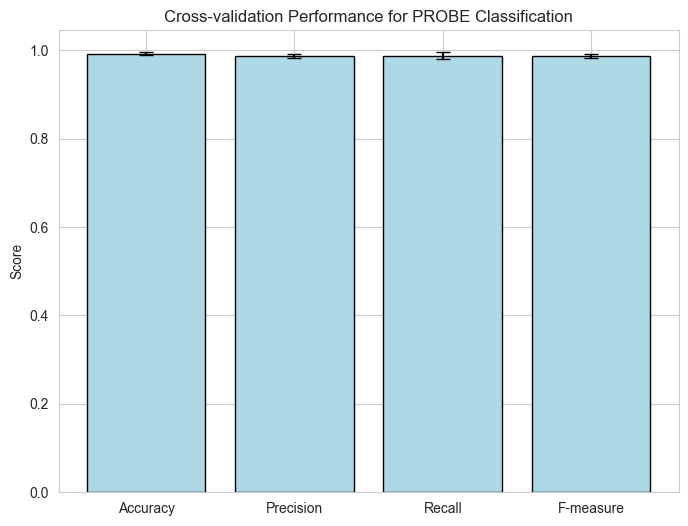

In [134]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for PROBE Classification')
plt.ylabel('Score')
plt.show()


#### R2L

In [135]:
# Evaluate the Voting Classifier on the R2L test set using cross-validation and various metrics

# Accuracy evaluation using 10-fold cross-validation
accuracy = cross_val_score(classifier_voting_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))  

# Precision evaluation using 10-fold cross-validation with macro averaging
precision = cross_val_score(classifier_voting_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))  

# Recall evaluation using 10-fold cross-validation with macro averaging
recall = cross_val_score(classifier_voting_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))  

# F-measure evaluation using 10-fold cross-validation with macro averaging
f = cross_val_score(classifier_voting_r2l, X_r2l_test, Y_r2l_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2)) 


Accuracy: 0.97221 (+/- 0.00639)
Precision: 0.95841 (+/- 0.00842)
Recall: 0.96470 (+/- 0.01078)
F-measure: 0.96100 (+/- 0.00930)


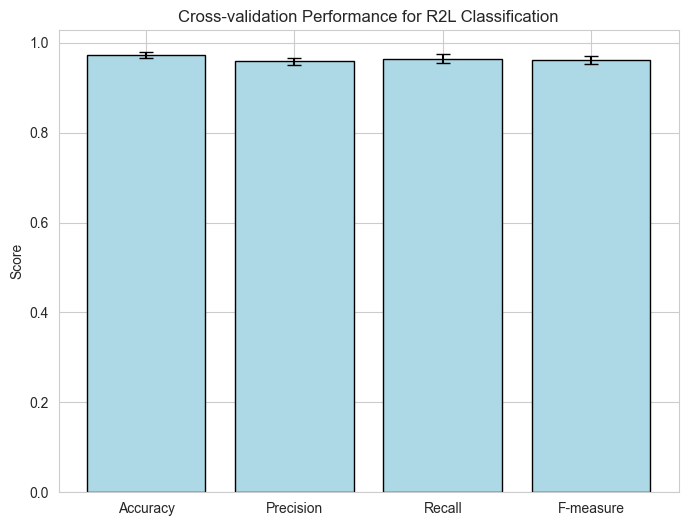

In [136]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for R2L Classification')
plt.ylabel('Score')
plt.show()

#### U2R

In [137]:
# Evaluate the Voting Classifier on the U2R test set using cross-validation and various metrics

# Accuracy evaluation using 10-fold cross-validation
accuracy = cross_val_score(classifier_voting_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))  

# Precision evaluation using 10-fold cross-validation with macro averaging
precision = cross_val_score(classifier_voting_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))  

# Recall evaluation using 10-fold cross-validation with macro averaging
recall = cross_val_score(classifier_voting_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))  

# F-measure evaluation using 10-fold cross-validation with macro averaging
f = cross_val_score(classifier_voting_u2r, X_u2r_test, Y_u2r_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))  


Accuracy: 0.99775 (+/- 0.00255)
Precision: 0.94823 (+/- 0.13520)
Recall: 0.86750 (+/- 0.16643)
F-measure: 0.90849 (+/- 0.11902)


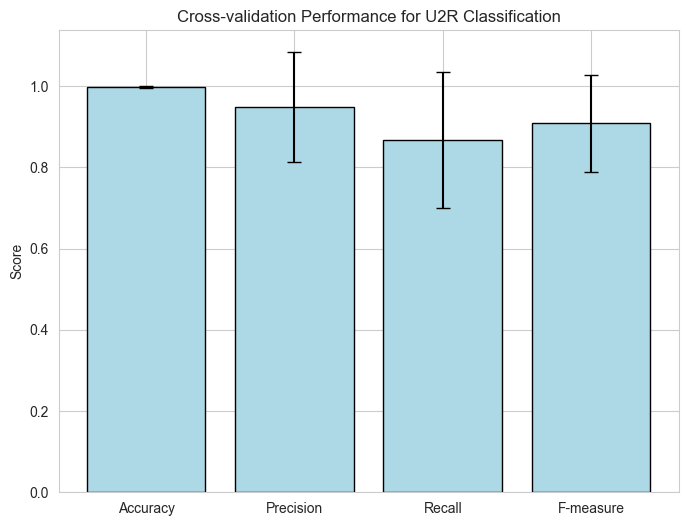

In [138]:
# Results for cross-validation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F-measure']
scores = [accuracy.mean(), precision.mean(), recall.mean(), f.mean()]
std_devs = [accuracy.std() * 2, precision.std() * 2, recall.std() * 2, f.std() * 2]

# Plotting the scores with error bars (standard deviation)
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, yerr=std_devs, capsize=5, color='lightblue', edgecolor='black')
plt.title('Cross-validation Performance for U2R Classification')
plt.ylabel('Score')
plt.show()

In [139]:
end_time = datetime.now()
time_interval = end_time - start_time

hours, remainder = divmod(time_interval.total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
milliseconds = time_interval.microseconds // 1000
# Format the result
formatted_time = f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}.{milliseconds:03}"
print(f"Elapsed Time: {formatted_time}")

Elapsed Time: 00:24:58.441
